# Programming Project 2 
## 605.649 Introduction to Machine Learning
## Ricca Callis

## Directions


The purpose of this assignment is to give you a chance to get some hands-on experience implementing
a nonparametric classification or regression algorithm. Specifically, you will be implementing a k-nearest
neighbor classifier and regressor. Be careful with how the attributes are handled. Nearest neighbor methods
work best with numeric attributes, so some care will need to be taken to handle categorical attributes.
In this project, and all future projects, the experimental design we will use is called 5-fold cross-validation.
The basic idea is that you are going to take your data set and divide it into five equally-sized subsets. When
you do this, you should select the data points randomly, but with a twist. Ultimately, you would like the
same number of examples to be in each class in each of the five partitions. This is called “stratified” crossvalidation.

For example, if you have a data set of 100 points where 1/3 of the data is in one class and 2/3
of the data is in another class, you will create five partitions of 20 examples each. Then for each of these
partitions, 1/3 of the examples (around 6 or 7 points) should be from the one class, and the remaining points
should be in the other class.

With five-fold cross-validation, you will run five experiments where you train on four of the partitions
(so 80% of the data) and test on the remaining partition (20% of the data). You will rotate through the
partitions so that each one serves as a test set exactly once. Then you will average the performance on these
five test-set partitions when you report the results.
For this assignment, you will use four datasets (two classification and two regression) that you will
download from the UCI Machine Learning Repository, namely:

1. Ecoli — https://archive.ics.uci.edu/ml/datasets/Ecoli
[Classification] A data set to classify localization sites of proteins in ecoli cells. Three of the classes
have a very small number of examples. These should be deleted from the data set.

2. Image Segmentation — https://archive.ics.uci.edu/ml/datasets/Image+Segmentation
[Classification] The instances were drawn randomly from a database of 7 outdoor images. The images
were handsegmented to create a classification for every pixel.

3. Computer Hardware — https://archive.ics.uci.edu/ml/datasets/Computer+Hardware
[Regression] The estimated relative performance values were estimated by the authors using a linear
regression method. The gives you a chance to see how well you can replicate the results with these two
models.

4. Forest Fires — https://archive.ics.uci.edu/ml/datasets/Forest+Fires
[Regression] This is a difficult regression task, where the aim is to predict the burned area of forest
fires, in the northeast region of Portugal, by using meteorological and other data .


### For this project, the following steps are required:

 Download the five (5) data sets from the UCI Machine Learning repository. You can find this repository
at http://archive.ics.uci.edu/ml/. All of the specific URLs are also provided above.


 Implement k-nearest neighbor and be prepared to find the best k value for your experiments. You
must tune k and explain in your report how you did the tuning

 Implement edited k-nearest neighbor. See above with respect to tuning k. Note that you will not apply
the edited nearest neighbor to the regression problems.

 Implement condensed k-nearest neighbor. See above with respect to tuning k. Note that you will not
apply the condensed nearest neighbor to the regression problems.

 Run your algorithms on each of the data sets. These runs should be done with 5-fold cross-validation
so you can compare your results statistically. You can use classification error or mean squared error
(as appropriate) for your loss function.

 Write a very brief paper that incorporates the following elements, summarizing the results of your
experiments.

1. Title and author name
2. A brief, one paragraph abstract summarizing the results of the experiments
3. Problem statement, including hypothesis, projecting how you expect each algorithm to perform
4. Brief description of algorithms implemented
5. Brief description of your experimental approach
6. Presentation of the results of your experiments
7. A discussion of the behavior of your algorithms, combined with any conclusions you can draw
8. Summary
9. References (you should have at least one reference related to each of the algorithms implemented, a reference to the data sources, and any other references you consider to be relevant)

 Submit your fully documented code, the outputs from running your programs, and your paper. Your
grade will be broken down as follows:

– Code structure – 10%
– Code documentation/commenting – 10%
– Proper functioning of your code, as illustrated by a 5 minute video – 30%
– Summary paper – 50%

In [1]:
# Author: Ricca Callis
# EN 605.649 Introduction to Machine Learning
# Programming Project #2
# Date Created: 6/22/2020
# File name: Programming Assignment 2 - Callis.ipynb
# Python Version: 3.7.5
# Jupyter Notebook: 6.0.1
# Description: Implementation of k-nearest neighbor classifier and regressor algorithms 
# using 4 datasets from the UCI Machine Learning Repository

"""
k-Nearest Neighbor (KNN) Algorithm: A lazy supervised learning algorithm for nonparametric data. 
Is used both for classification and regression problems. KNN algorithm stores all available cases 
and classifies new cases based on a similarity measure (e.g., distance functions).  
"""

"""
k-Nearest Neighbor Classifier: When KNN is used for classification, the output can be calculated as 
the class with the highest frequency from the K-most similar instances. Each instance in essence votes 
for their class and the class with the most votes is taken as the prediction.
"""

"""
k-Nearest Neighbor Regressor:When KNN is used for regression problems the prediction is based on the 
mean or the median of the K-most similar instances.

"""

"""
Required Data Sets:
    ecoli.data.csv
    ecoli.names.csv
    forestfires.data.csv
    forestfires.names.csv
    machine.data.csv
    machine.names.csv
    segmentation.data.csv
    segmentation.names.csv
""" 


'\nRequired Data Sets:\n    ecoli.data.csv\n    ecoli.names.csv\n    forestfires.data.csv\n    forestfires.names.csv\n    machine.data.csv\n    machine.names.csv\n    segmentation.data.csv\n    segmentation.names.csv\n'

In [2]:
from platform import python_version
print ( python_version() )

3.7.5


In [3]:
# Common standard libraries
import datetime
import time
import os
# Common external libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import sklearn #scikit-learn
import sklearn
from sklearn.model_selection import train_test_split 
import random as py_random
import numpy.random as np_random
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import scipy.stats as stats
from toolz import pipe # pass info from one process to another (one-way communication)
from typing import Callable, Dict, Union, List
from collections import Counter, OrderedDict
import logging
from itertools import product
import warnings
import io
import requests as r

logging.basicConfig ( filename ='logfile.txt' )
#logging.basicConfig()
logging.root.setLevel ( logging.INFO )
logger = logging.getLogger ( __name__ )

In [4]:
% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:
# Check current directory
currentDirectory = os.getcwd()
print ( currentDirectory )

In [5]:
# Input data files are available in the ".../input/" directory
# Change the Current working Directory
os.chdir ( '/Users/riccacallis/Desktop/JHU/Data Science/Introduction to Machine Learning/Programming Project 2/input' )

# Get Current working Directory
currentDirectory = os.getcwd()
print ( currentDirectory )

/Users/riccacallis/Desktop/JHU/Data Science/Introduction to Machine Learning/Programming Project 2/input


In [6]:
# List files in input directory
from subprocess import check_output
print ( check_output ( [ "ls", "../input" ] ).decode ( "utf8" ) )

ecoli.data.csv
ecoli.names.csv
forestfires.data.csv
forestfires.names.csv
machine.data.csv
machine.names.csv
segmentation.data.csv
segmentation.names.csv



# Supervised Learning

Goal: Make a prediction
   - Estimate (i.e., learn) a function (f) that maps input variables (X) to output variables (Y).
   
Where y can be:
   - Real Number: Regression
   - Categorical: Classification
   - Complex Object: Ranking # of items, parse tree, etc.
   
Data is labeled:
   - Data has many pairs { (x, y) }
       - x: Vector of binary, categorical, real valued features/attributes
       - y: class ( {+1, -1}, or a real number )
       
Method: An algorithm learns this target mapping function from training data.
   - Create subsets of data:
       - Training Set
       - Testing Set
   - Estimate y = f(x) on X, Y
   - Assume the same f(x) generalizes (i.e., works on unseen X', Y')
   
   
# Nonparametric

*Nonparametric Machine Learning Algorithms*: Algorithms that do not make strong assumptions about the form of the mapping function. By not making assumptions, they are free to learn any functional form from the training data.
    - Thus, there is no assumed distribution


## Benefits

*Flexibility*: Capable of fitting a large number of functional forms.

*Power*: No assumptions (or weak assumptions) about the underlying function.

*Performance*: Can result in higher performance models for prediction.

## Limitations

*More data*: Require a lot more training data to estimate the mapping function.

*Slower*: A lot slower to train as they often have far more parameters to train.

*Overfitting*: More of a risk to overfit the training data and it is harder to explain why specific predictions are made.

# Classification vs Regression

Nonparametric analyses include both classification and regression problems

**Classification**
- Has a discrete value as its output.
- Has predictor (or set of predictors) and a label. 
- Determines inclusion or exclusion in group (or class) based on a predicting factor 
- Standard practice to represent the output (label) of a classification algorithm as an integer, where, 0 = exclusion and 1 = inclusion
- In the data set, each row is typically called an example, observation, or data point
- In the data set, each column represents either an attribute/feature or a class/label

**Regression**
- Has a real number (a number with a decimal point) as its output.
- Has an independent variable (or set of independent variables) and a dependent variable (the thing we are trying to guess given our independent variables).
- In the data set, each row is typically called an example, observation, or data point
- In the data set, each column (not including the label/dependent variable) is often called a predictor, dimension, independent variable, or feature.

# K-Nearest Neighbors


**Overview:**

Is a supervised learning algorithm for nonparametric classification or regression problems.

The algorithm makes predictions based on the k-most similar training patterns for a new data instance. The method does not assume anything about the form of the mapping function other than patterns that are close are likely to have a similar output variable.


## KNN Learning

Assumes all instances correspond to points in the *n*-dimensional space, $\ A^n$ 

Predictions are made for a new instance (x) by searching through the entire training set for the k-most similar instances (the neighbors) and summarizing the output variable for those k-instances. For regression this might be the mean output variable, in classification this might be the mode (or most common) class value.

To determine which of the k-instances in the training dataset are most similar to a new input, a distance measure is used (usually the standard Euclidean distance).

Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (xi) across all input attributes j.

EuclideanDistance(x, xi) = sqrt( sum( (xj – xij)^2 ) )

### 3 Parts to KNN

This k-Nearest Neighbors tutorial is broken down into 3 parts:

Step 1: Calculate Euclidean Distance.

Step 2: Get Nearest Neighbors.

Step 3: Make Predictions.

### KNN for Discrete-Valued Functions: KNN Classification

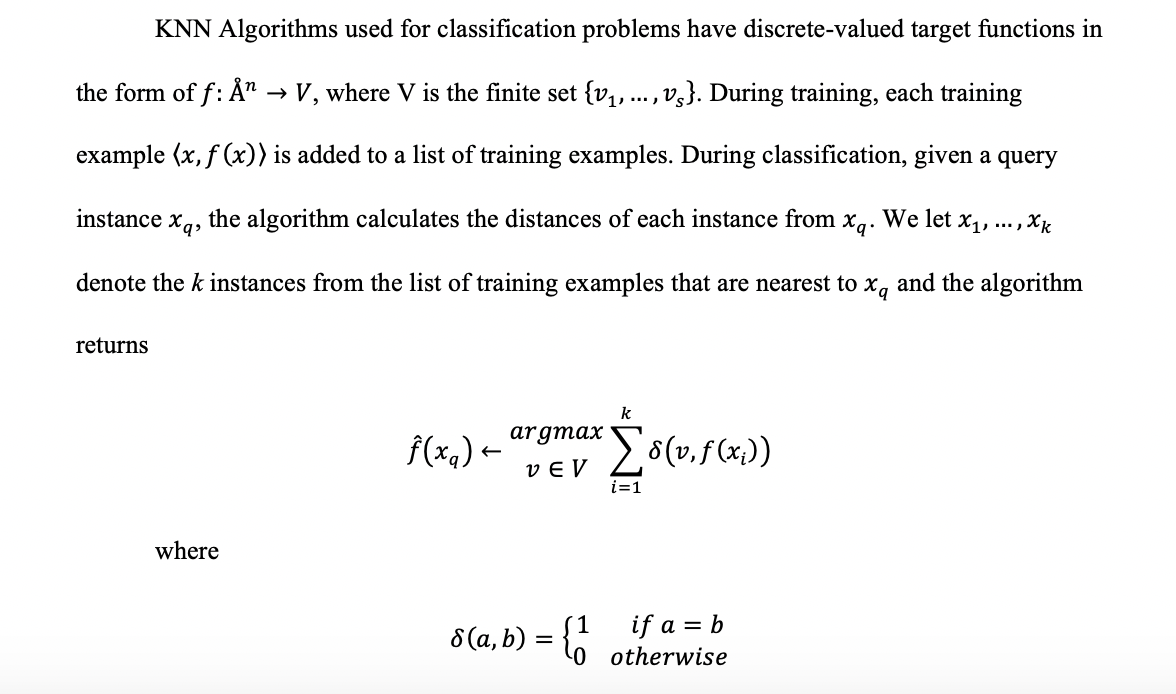

### KNN Classification Pseudo Code

- Load the data
- Initialise the value of k
- To predict target function's class, iterate from 1 to total number of training data points
- Calculate the Euclidean distance between test data and each row of training data
- Sort the calculated distances in ascending order based on distance values
- Get top k rows from the sorted array
- Get the most frequent class of these rows
- Return the predicted class

In [7]:
# Implementation of K-Nearest Neighbors Algorithm
# KNN Classifier

'''''
Class: KNearestNeighbors
    - Supervised Learning Algorithm for nonparametric classification problems 

Functions:
    - __init__: Initializes the KNearestNeighbors algorithm 
    - fit: Fits KNN by saving values of 'X' and 'y'
    - get_distance: Obtains distances between rows of X and x_0 (initial/selected row)
    - get_nearest_neighbors: Given the distances, function obtains the nearest neighbors
    - predict_probability_single_instance: Obtains the count within the k-neighbors for each class
    - predict_probability: Applies the probability obtained from function predict_probability_single_instance 
      and applies it across 1 or many instances
    - predict: Make predictions for the rows in X

'''''

class KNearestNeighbors:
    
    """
    Class to perform KNN algorithm for classification.
        Parameters
            k: Indicates the number of neighbors to take into account in the voting scheme. Type: Integer
            distance_function: A function to calculate the distance between 2 points in a feature space. Defaults to 2. Type: Callable   
    """

    def __init__ (
        # Initialize parameters
        self, # Class instance
        k: int, #  The nearest neighbor we wish to take the vote from
        distance_function: Callable = lambda x, x0: np.sum ( np.subtract ( x, x0 ) ** 2 ),
    ):

        # Initialize class instances
        self.k = k
        self.distance_function = distance_function

    def fit ( self, X: np.ndarray, y: np.ndarray ):
        
        """
        Function fits KNN by saving the values of `X` and `y`.
            Parameters
                X: Indicates the feature matrix. Type: Array (np.ndarray)
                y: Indicates the target vector. Type: Array (np.ndarray)
        """
        
        self.X = X
        self.y = y

    def get_distance ( self, X: np.ndarray, x0: np.ndarray ):
        
        """
        Function obtains distances between the rows of X and x_0.
            Parameters
                X : Indicates a matrix of observations. Type: Array (np.ndarray)
                x0 : Indicates the row to get the distances against the matrix. Type: Array (np.ndarray)
            Returns: Distance from query point to data instance across each row in the feature matrix
        """
        
        # Apply distance_function across rows of X
        return [ self.distance_function ( row, x0 ) for row in X ]
        # End get_distance()

    def get_nearest_neighbors ( self, distances: List [ float ] ):
        
        """
        Function obtains nearest neighbors, given the distances.
            Parameters
                distances: Indicates a list of distances. Type: Float List
            Returns: distance_map (a sorted key-value list mapping instances based on their k & distance)
        """
        
        return pipe (
            # Map index to distance
            dict ( enumerate ( distances ) ),
            # Sort the indices based on their value in the mapping and take the 1st k
            lambda distance_map: sorted ( distance_map, key = distance_map.get ) [: self.k ],
        ) # End get_nearest_neighbors()

    def predict_probability_single_instance ( self, row: np.ndarray ):
        
        """
        Function obtains the count within the k-neighbors for each class
            Parameters
                row : Indicates the row used for prediction. Type: Array (np.ndarray)
            Returns: Number of neighbors in a class
        """
        
        # Get the pairwise distances with X
        distances = self.get_distance ( X = self.X, x0 = row )

        # Get the k-nearest neighbors
        nearest_neighbors = self.get_nearest_neighbors ( distances = distances )

        # For each class, get the number of the neighbors that is in that class
        return {
            cls: np.sum ( self.y [ nearest_neighbors ] == cls )
            # Ensure no tie-breakers
            # Shuffle for coin flip
            # Sorted takes the 1st in ties
            for cls in np.random.permutation ( np.unique ( self.y ))
        } # End predict_probability_single_instance()

    def predict_probability ( self, X: np.ndarray ):
        
        """
        Applies the probability obtained from function predict_probability_single_instance and applies it 
        across 1 or many instances
            Parameters:
                X : Indicates the matrix to make predictions for. Type: Array (np.ndarray)
            Returns: Predicted probability of class assignment for each instance in the selected feature matrix.
        """
        
        # If 1 instance
        if X.ndim == 1:
            return [ self.predict_probability_single_instance ( X ) ]
        # Else many instances
        return [ self.predict_probability_single_instance ( row ) for row in X ]
        # End predict_probability()

    def predict ( self, X: np.ndarray ):
        
        """
        Make predictions for the rows in X
            Parameters:
                X : Indicates the matrix to make predictions for. Type: Array (np.ndarray)
            Returns: A list (key:map) of the largest probabilities for each row in X and across all classes
        """
        
        # Get the largest count across all the classes for each row in X
        return list (
            map ( lambda probs: max ( probs, key = probs.get ), self.predict_probability ( X = X ) )
        ) # End predict()
        
    # End class KNearestNeighbors

# Helper Function for KNN Classification Problems
# Standarize Input Data for KNN Classification

'''''
Class: Standardizer
    - Because distance measures are strongly affected by the scale of the input data (i.e., KNN performs much better if 
    all of the data has the same scale), this class standardizes input features.

Functions:
    - __init__: Initializes the Standardizer 
    - fit: Calculates columnwise mean and standard deviation
    - transform: Applies the columnwise mean and std transformations
    - fit_transform: Fits on the columns and then transforms X

'''''

class Standardizer:
    
    """
    Class to standardize input features.
    """

    def __init__ ( self, mean = True, std = True ):
        # Initialize parameters
        # Class instances
        self.mean = mean
        self.std = std

    def fit ( self, X ):
        
        """
        Calculates the columnwise mean and standard deviation
            Parameters:
                X: Indicates the matrix to make predictions for. Type: Array (np.ndarray)
        """
        
        if self.mean:
            self.df_means = X.mean ( axis = 0 )  # Get the colwise means
        if self.std:
            self.df_std = X.std ( axis = 0 )  # Get the colwise stds

    def transform ( self, X ):
        
        """
        Applies the columnwise mean and std transformations
            Parameters:
                X: Indicates the matrix to make predictions for. Type: Array (np.ndarray)
            Returns: df_xf a dataframe of transformed x's
        """
        
        if not self.mean and not self.std:
            return X
        if self.mean:
            df_xf = X - self.df_means  # Subtract means
        if self.std:
            is_zero = np.isclose ( self.df_std, 0 )  # If non-zero variance,
            with warnings.catch_warnings():
                warnings.simplefilter ( "ignore" )
                df_xf = np.where (
                    is_zero, X, X / self.df_std
                )  # Ensure no divide by zero issues

        return df_xf
        # End transform()

    def fit_transform ( self, X ):
        
        """
        Fits on the columns and then transforms X
            Parameters:
                X: Indicates the matrix to make predictions for. Type: Array (np.ndarray)
        """
        self.fit ( X )
        return self.transform ( X )
        # End fit_transform()
        
    #End class Standardizer

### KNN for Continuous-Valued Functions: KNN Regression

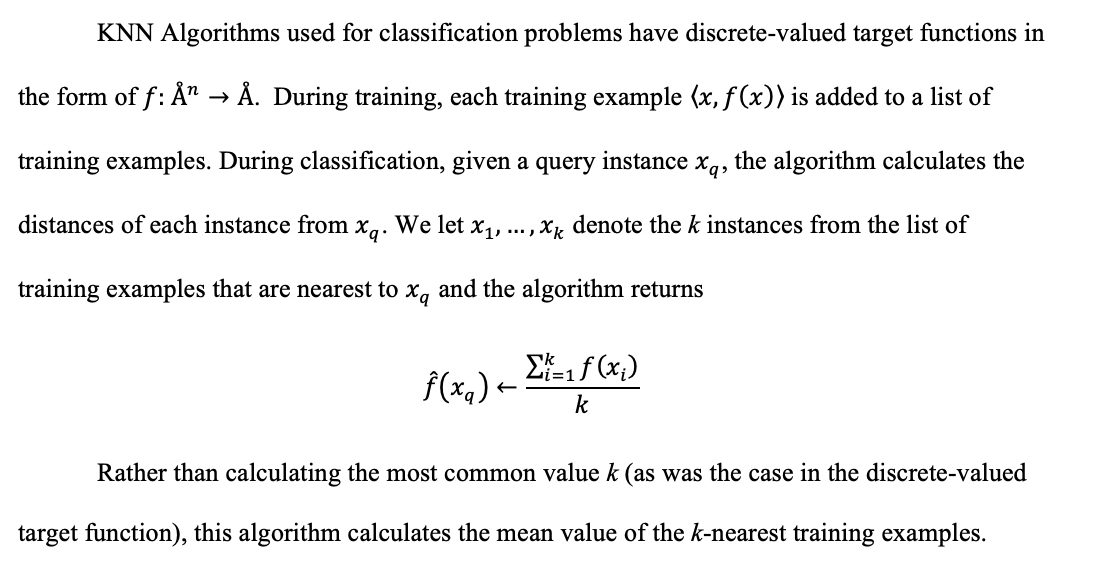

In [8]:
# Implementation of K-Nearest Neighbors Algorithm
# KNN Regression

'''''
Class: KNearestNeighborRegression
    - Supervised Learning Algorithm for nonparametric regression problems 

Parameter:
    - KNearestNeighbors
    
Functions:
    - __init__: Initializes the KNearestNeighborRegression algorithm 
    - predict_probability_single_instance: Obtains the mean target value within the k-neighbors
    - predict_probability: Applies the probability obtained from function predict_probability_single_instance 
      and applies it across 1 or many instances
    - predict: Make predictions for the rows in X

'''''

class KNearestNeighborRegression ( KNearestNeighbors ):
    
    """
    Class to perform KNN algorithm for classification.
        Parameters
            KNearestNeighbors: Class to perform KNN classification
            k: Indicates the number of neighbors to take into account in the voting scheme. Type: Integer
            distance_function: A function to calculate the distance between 2 points in a feature space. Defaults to 2. Type: Callable   
    """

    def __init__ (
        # Initialize parameters
        self, # Class instance
        k: int,  # The nearest neighbor we wish to take the vote from
        distance_function: Callable = lambda x, x0: np.sum ( np.subtract ( x, x0 ) ** 2 ),
    ):

        super().__init__ ( k = k, distance_function = distance_function )

    def predict_probability_single_instance ( self, row: np.ndarray ):
        
        """
        Function obtains the mean target value within the k-neighbors
            Parameters
                row : Indicates the row to do to predictions for. Type: Array (np.ndarray)
            Returns: The mean of the target vector's nearest neighbor
        """
        
        # Get distances
        distances = self.get_distance ( X = self.X, x0 = row )
        # Get neighbors
        nearest_neighbors = self.get_nearest_neighbors ( distances = distances )
        # Get mean of y of neighbors
        return np.mean ( self.y [ nearest_neighbors ] )
        # End predict_probability_single_instance

    def predict ( self, X: np.ndarray ):
        
        """
        Function make predictions for the rows in X
            Parameters:
                X : Indicates the matrix to make predictions for. Type: Array (np.ndarray)
            Returns: Predicted probability of class assignment for each instance in the selected feature matrix. 
        """
        
        return self.predict_probability ( X = X )
        # End predict()
    
    # End class KNearestNeighborRegression 

## Condensed KNN

Condensed Nearest Neighbors algorithm helps to reduce the dataset X for kNN classification. It constructs a subset of examples which are able to correctly classify the original data set using k=1.

Algorithm returns a subset Z of the data set X, NOT the array of misclassified points.

Similar to a forward stepwise process

Advantage: Decreases execution time, reduces space complexity

### 3 Steps to Condensed KNN

Step 1: Scan all elements of X, looking for an element x whose nearest neighbor from Z has a different label than x

Step 2: Remove x from X and add it to Z

Step 3: Repeat the scan until no more instances are added to Z

In [9]:
# Improve Cost of KNN
# Condensed KNN

'''''
Class: CondensedKNN
    - A more cost-efficient KNN Algorithm which reduces the number of comparisons needed in order to classify a 
      new observation. It constructs a subset of examples which are able to correctly classify the original data 
      set using a 1-NN algorithm (k = 1).

Functions:
    - __init__: Initializes the CondensedKNN algorithm 
    - get_inclusion: Determines whether a specified row (called 'row_index') should be included in the condensed set/subset set Z. 
    - fit: Fits the Condensed KNN
    - predict: Make predictions for the rows in X

'''''

class CondensedKNN:
    
    """
    Class to perform Condensed KNN
        Parameters:
            verbose: Boolean conditional. If true, will print intermediate results. Type: Boolean
            knn : Indicates the underlying KNN object that will be used for making predictions.
    """

    def __init__(
        # Initialize parameters
        self, verbose: bool = False, knn: KNearestNeighbors = KNearestNeighbors ( k = 1 )
    ):

        # Class instances
        self.knn = knn
        # Make sure k = 1 always
        self.knn.k = 1  
        self.verbose = verbose

    def get_inclusion ( self, X: np.ndarray, y: np.ndarray, row_index: int, subset_Z: List [ int ] ):
        
        """
        Determines whether a specified row (called 'row_index') should be included in the condensed set.
            Parameters:
                X: Indicates the feature matrix for training. Type: Array (np.ndarray)
                y: Indicates the labels for training. Type: Array (np.ndarray)
                row_index: Indicates the proposed row of X to include in subset_Z. Type: Integer
                subset_Z: Indicates the list of rows that have already been included; Subset Z of data set X. Type: Integer List
            Returns:
                True if row is included in subset Z (i.e., row is added to subset Z)
                False otherwise (i.e., row was not added to subset Z)
        """
        
        # Fit the KNN on just the rows of Z. 
        # Remember that k = 1.
        self.knn.fit ( X [ subset_Z ], y [ subset_Z ] )

        # If the prediction is incorrect
        if self.knn.predict ( X [ row_index ] ) != y [ row_index ]:
            
            # Add row_index to subset Z
            subset_Z.append ( row_index )

            # Return True (change to subset Z has occured; row_index was added to subset Z)
            return True

        return False
        # End get_inclusion()

    def fit ( self, X: np.ndarray, y: np.ndarray ):
        
        """
        Function to run the condensed KNN fitting procedure.
            Parameters:
                X: Indicates the feature maxtrix. Type: Array (np.ndarray)
                y: Indicates the target vector. Type: Array (np.ndarray)
        """
        
        # Track changes to subset Z
        is_changed = True

        # Z begins as empty set
        subset_Z = []
        while is_changed:
            is_changed = False
            # If subset Z is empty, add the 1st element of feature matrix X
            if not subset_Z:
                subset_Z.append ( 0 )

            # Iterate through rows of X
            for row_index in range ( 1, len ( X ) ):
                # If the row is not already in Z
                if row_index not in subset_Z:
                    # Run inclusion procedure
                    changed = self.get_inclusion ( X, y, row_index, subset_Z)
                    # Track changes to subset Z
                    is_changed = True if changed else is_changed
        # Fit model over rows of subset Z
        self.knn.fit ( X [ subset_Z ], y [ subset_Z ] )
        # End fit()

    def predict ( self, X: np.ndarray ):
        
        """
        Function make predictions for the rows in X
            Parameters:
                X: Indicates the matrix to make predictions for. Type: Array (np.ndarray)
        """
        
        return self.knn.predict ( X )
        # End predict()
    # End class CondensedKNN

## Edited KNN

In [10]:
# Reduce Error Rate & Computational Cost
# Edited KNN

'''''
Class: EditedKNN
    - The edited k-nearest neighbor consists of the application of the k-nearest neighbor classifier with an edited 
    training set, in order to reduce the classification error rate. This edited training set is a subset of the 
    complete training set in which some of the training patterns are excluded.

Functions:
    - __init__: Initializes the EditedKNN algorithm 
    - get_exclusion: Determines whether a specified row (called 'row_index') should be excluded from the condensed set/subset set Z. 
    - validation_error_decreasing: Obtains validation scores
    - fit: Fits the Condensed KNN
    - predict: Make predictions for the rows in X

'''''

class EditedKNN:
    
    """
    Performs the EditedKNN algorithm for classification.
        Parameters
            k: Indicates the number of neighbors to consider in the voting scheme. Type: Integer 
            proportion_cv: Indicates the proportion of the training set that should be used for validation (i.e., when to stop training)
            verbose: Boolean conditional. If true, will log intermediate steps. Type: Boolean. 
    """

    def __init__ ( self, k, proportion_cv = 0.1, verbose = False ):

        # Initialize parameters
        # Class instances
        self.knn = KNearestNeighbors ( k = k )
        self.k = k
        self.proportion_cv = proportion_cv
        self.verbose = verbose

    def get_exclusion ( self, X, y, row_index, subset_Z ):
        
        """
        Function to determine if the specified row (row_index) of X should be excluded from the final training set
            Parameters
                X: Indicates the feature matrix. Type: Array (np.ndarray)
                y: Indicates the target vector. Type: Array (np.ndarray)
                row_index: Indicates the row of X under consideration. Type: Integer
                subset_Z: Indicates the list of rows that have already been included; Subset Z of data set X. Type: Integer List
            Returns
                False if row_index remains in subset Z (i.e., was NOT removed)
                True otherwise (i.e., row_index was removed from subset Z)
        """

        # Remove row_index from subset_Z
        subset_Z.remove ( row_index )
        # Fit the model
        self.knn.fit ( X [ subset_Z ], y [ subset_Z ] )
        # If classification is correct, put row_index back in subset_Z (i.e., don't drop it from the training set)
        # If actual & predicted are the same, do nothing
        # If actual != predicted, drop it
        if y [ row_index ] == self.knn.predict ( X [ row_index ] ):
            subset_Z.append ( row_index )
            return False
        return True
        # End get_exclusion()

    def validation_error_decreasing ( self, X_validation, y_validation, last_validation_score ):
        
        """
        Function to obtain validation scores
            Parameters
                X_validation: Indicates the feature matrix for the validation set. Type: Array (np.ndarray)
                y_validation: Indicates the target vector for the validation set. Type: Array (np.ndarray)
                last_validation_score: Indicates the previous validation score. Type: Float
            Returns: The mean error in the validation set and identifies whether error is less than the previous 
            validation score (indicating decreasing error)
        """
        
        error = np.mean ( np.array ( self.knn.predict ( X_validation ) ) != np.array ( y_validation ) )
        return error < last_validation_score, error
        # End validation_error_decreasing()

    def fit ( self, X, y ):
        
        """
        Function to run the edited fitting procedure.
            Parameters
                X: Indicates the feature matrix. Type: Array (np.ndarray)
                y: Indicates the target vector. Type: Array (np.ndarray)
        """
        
        # Split off subset for validation
        n_holdout = int ( len ( X ) * self.proportion_cv )
        X_validate = X [ :n_holdout ]
        y_validate = y [ :n_holdout ]
        X_train = X [ n_holdout :]
        y_train = y [ n_holdout: ]

        # Starting edited set with all indices in it.
        subset_Z = list ( range ( len ( X_train ) ) )

        # Tracking validation scores
        validation_decreasing = True
        last_validation_score = np.inf

        # Tracking changes to the edited set
        is_changed = True

        # While changes to edit set and validation scores decreasing...
        while is_changed and validation_decreasing:
            is_changed = False

            # For each row in X
            for row_index in range ( len ( X_train ) ):
                # Only indices that are still in Z can be eliminated
                if row_index in subset_Z:
                    # Run the exclusion
                    changed = self.get_exclusion ( X_train, y_train, row_index, subset_Z )
                    # Track if changes are made
                    is_changed = True if changed else is_changed

            # Fit the model on the edited set and get validation scores
            self.knn.fit ( X [ subset_Z ], y [ subset_Z ] )
            (
                validation_decreasing,
                last_validation_score,
            ) = self.validation_error_decreasing (
                X_validation = X_validate,
                y_validation = y_validate,
                last_validation_score = last_validation_score,
            )
            #End fit()

    def predict ( self, X ):
        
        """
        Make predictions for the rows in X
            Parameters:
                X: Indicates the matrix to make predictions for. Type: Array (np.ndarray)
        """
        
        return self.knn.predict ( X )
        # End predict()
    # End class EditedKNN


# Model Evaluation

Loss functions are used by algorithms to learn the classification models from the data.

Classification metrics, however, evaluate the classification models themselves. 

For a binary classification task, where "1" is taken to mean "positive" or "in the class" and "0" is taken to be "negative" or "not in the class", the cases are:

1. The true class can be "1" and the model can predict "1". This is a *true positive* or TP.
2. The true class can be "1" and the model can predict "0". This is a *false negative* or FN.
3. The true class can be "0" and the model can predict "1". This is a *false positive* or FP.
4. The true class can be "0" and the model can predict "0". This is a *true negative* or TN.


## Training Learners with Cross-Validation

Fundamental assumption of machine learning:The data that you train your model on must come from the same distribution as the data you hope to apply the model to.

Cross validation is the process of training learners using one set of data and testing it using a different set.

Options:
    - Divide your data into two sets:
        1. The training set which you use to build the model
        2. The test(ing) set which you use to evaluate the model. 
    - kfolds: Yields multiple estimates of evaluation metric

    
### k-fold Cross-Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups (or folds) that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=5 becoming 5-fold cross-validation.


The general procedure is as follows:
- Shuffle the dataset randomly.
- Split the dataset into k groups (or folds)
- Save first fold as the validation set & fit the method on the remaining k-1 folds
- For each unique group:
    - Take the group as a hold out or test data set
    - Take the remaining groups as a training data set
- Fit a model on the training set and evaluate it on the test set
- Retain the evaluation score and discard the model
- Summarize the skill of the model using the sample of model evaluation scores
    - The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model

Importantly, each observation in the data sample is assigned to an individual group and stays in that group for the duration of the procedure. This means that each sample is given the opportunity to be used in the hold out set 1 time and used to train the model k-1 times.

Below is the visualization of a k-fold validation when k=10.

Looks like:

|  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| **Test** | Train | Train | Train | Train | Train | Train | Train | Train | Train |

|  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Train| **Test** | Train | Train | Train | Train | Train | Train | Train | Train |

|  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Train| Train | **Test** | Train | Train | Train | Train | Train | Train | Train |

And finally:

|  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9  |  10 |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Train| Train | Train | Train | Train | Train | Train | Train | Train | **Test** |

### Stratified k-fold Cross-Validation
Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole. For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.

For classification problems, one typically uses stratified k-fold cross-validation, in which the folds are selected so that each fold contains roughly the same proportions of class labels.


In [11]:
# Model Evaluation

# Teaching Learners with Cross-Validation
# k-Folds

'''''
Class: KFoldCV
    - Class to handle K-fold Cross-Validation

Functions:
    - __init__: Initializes the EditedKNN algorithm 
    - get_indices: Obtains indices of length of rows in feature matrix X
    - get_one_split: Given the split indices, obtains one of the splits
    - get_indices_split: Splits the indices by the number of folds
    - split: Creates a generator of train test splits from the feature matrix X
'''''

class KFoldCV:
    
    """
    Class to handle K-Fold Cross-Validation
        Parameters
            number_of_folds : Indicates the number of folds or splits. Type: Integer
            shuffle : If True, rows will be shuffled before the split. Type: Boolean
    """

    def __init__( self, number_of_folds: int, shuffle: bool = True ):
        # Initialize parameters
        # Class instances
        self.number_of_folds = number_of_folds
        self.shuffle = shuffle

    def get_indices ( self, X ):
    
        """
        Function obtains indices of length of rows in feature matrix X
            Parameters
                X: Indicates the matrix to make predictions for. Type: Array (np.ndarray)
            Returns: Shuffled K-Fold Indices matrix (arranged by row)
        """
       
        # Shuffle if `self.shuffle` is true.
        nrows = X.shape [ 0 ]
        return (
            np.random.permutation (
                np.arange ( nrows )
            )  # Shuffle the rows if `self.shuffle`
            if self.shuffle
            else np.arange ( nrows )
        ) # End get_indices()

    def _get_one_split ( split_indices, number_of_split ):
    
        """
        Given the split indices, function obtains one of the training splits
            Parameters
                number_of_folds: Indicates the number of folds or splits. Type: Integer
                split_indices: Indicates array of indices in the training split. Type: Integer
            Returns: number_of_split. Given the split index, obtains the number of split elememnts
        """
    
        # Given the split indices, get the `number_of_split` element of the indices.
        return ( np.delete ( np.concatenate ( split_indices ), split_indices [ number_of_split ] ),  # Drops the test from the train
            split_indices [ number_of_split ],)  # Gets the train
        # End get_one_split

    def _get_indices_split ( indices, number_of_folds ):
    
        """
        Function splits the indices by the number of folds
            Parameters
                indices: Indicates the index of the training/spilt data Type: Integer
                number_of_folds: Indicates the number of folds or splits. Type: Integer
            Returns: array split by indices
        """
        # Split the indicies by the number of folds
        return np.array_split ( indices, indices_or_sections = number_of_folds )
        # End get_indices_split()

    def split ( self, X: np.ndarray, y: np.ndarray = None ):
    
        """
        Function creates a generator of train/test splits from feature matrix X
            Parameters
                X: Indicates the matrix to make predictions for. Type: Array (np.ndarray)
            Returns: All but one split as train data (Type: Array) and one split as test data (Type: Array).
        """
        # Split the indices into `number_of_folds` subarray
        indices = self.get_indices ( X )
        split_indices = KFoldCV._get_indices_split ( indices = indices, number_of_folds = self.number_of_folds )
        for number_of_split in range ( self.number_of_folds ):
            # Return all but one split as train, and one split as test
            yield KFoldCV._get_one_split ( split_indices, number_of_split = number_of_split )
        # End split()
    # End class KFoldCV

'''''
Class: KFoldStratifiedCV
    - Class to conduct Stratified K-Fold Cross Validation. Ensures the splitting of data into folds is governed by 
    criteria such as ensuring that each fold has the same proportion of observations with a given categorical 
    value, such as the class outcome value.

Functions:
    - __init__: Initializes the KFoldStratifiedCV algorithm 
    - add_split_col: Adds new column called "split"
    - split: Takes an array of classes, and creates train/test splits with proportional examples for each group.
'''''

class KFoldStratifiedCV:
    
    """
    Class to conduct Stratified K-Fold Cross Validation.
        Parameters
            number_of_folds: Indicates the number of folds or splits. Type: Integer
            
    """

    def __init__ ( self, number_of_folds, shuffle = True ):
        # Initialize parameters
        # Class Instances
        self.number_of_folds = number_of_folds
        self.shuffle = shuffle

    def add_split_col ( self, arr ):
    
        """
        Function adds new column called "split"
            Parameters
                arr: Indicates an array
            Returns: New column in dataframe with index & split
            
        """
        arr = arr if not self.shuffle else np.random.permutation ( arr )
        n = len ( arr )
        k = int ( np.ceil ( n / self.number_of_folds ) )
        return pd.DataFrame (
            { "index": arr, "split": np.tile ( np.arange ( self.number_of_folds ), k )[ 0:n ] , }
        )

    def split ( self, y, X = None ):
    
        """
        Function takes an array of classes, and creates train/test splits with proportional examples for each group.
            Parameters
                y: Indicates the array of class labels. Type: Array (np.array)
            Returns: Dataframe with index values of not cv split & cv split train and test data
        """
        # Make sure y is an array
        y = np.array ( y ) if isinstance ( y, list ) else y

        # Groupby y and add integer indices.
        df_with_split = (
            pd.DataFrame ( { "y": y, "index": np.arange ( len ( y ) ) } )
            .groupby ( "y" ) [ "index" ]
            .apply ( self.add_split_col )  # Add col for split for instance
        )

        # For each fold, get train and test indices (based on col for split)
        for cv_split in np.arange ( self.number_of_folds - 1, -1, -1 ):
            train_bool = df_with_split [ "split" ] != cv_split
            test_bool = ~ train_bool
            # Yield index values of not cv_split and cv_split for train, test
            yield df_with_split [ "index" ].values [ train_bool.values ], df_with_split [
                "index"
            ].values [ test_bool.values ]
            # End split()
    # End class KFoldStratifiedCV

## Parameter Tuning

Parameter tuning is the process to selecting the values for a model’s parameters that maximize the accuracy of the model.


A machine learning model has two types of parameters:

    1. Parameters learned through a machine learning model
    
    2. Hyper-parameters passed to the machine learning model


In KNN algorithm, the hyper-parameter is the specified value of k. 

Normally we randomly set the value for these hyper parameters and see what parameters result in best performance. However randomly selecting the parameters for the algorithm can be exhaustive.


## Grid Search

Instead of randomly selecting the values of the parameters, GridSearch automatically finds the best parameters for a particular model. Grid Search is one such algorithm.

Grid Search evaluates all the combinations from a list of desired hyper-parameters and reports which combination has the best accuracy.

### Process

Step 1: Set your hyper-parameters ("param_grid" here).

Step 2: Fit the model. Use k-fold cross-validation internally on selected hyper-parameters. Store model average & accuracy.

Step 3: Go back to step 1 changing at least 1 hyper-parameter

Step 4: Select hyperparameter which gives best performance (highest accuracy)

Note that the search is not done within each fold. Instead, cross-validation is used to evaluate the performance of the model with the current combination of hyperparameters.

In [12]:
# Model Evaluation
# Parameter Tuning with Grid Search
            

'''''
Class: GridSearchCV
    - Grid Search evaluates all the combinations from a list of desired hyper-parameters and reports 
    which combination has the best accuracy.

Functions:
    - __init__: Initializes the GridSearchCV algorithm 
    - create_param_grid: Creates a mapping of arguments to values to grid search over.
    - get_single_fitting_iteration: Runs a model fit and validation step.
    - get_cv_scores: Runs the grid search across the parameter grid.
'''''

class GridSearchCV:
    
    """
    Class to assist with grid searching over potential parameter values.
        Parameters:
            model_callable: Function that generates a model object. Should take the keys of param_grid as arguments. Type: Callable
            param_grid: Mapping of arguments to potential values. Type: Dictionary
            scoring_func: Takes in y and yhat and returns a score to be maximized. Type: Callable
            cv_object: A CV object that will be used to make validation splits.
    """

    def __init__(
        # Initialize parameters
        self,
        model_callable: Callable, # Generates model object; takes keys of param_grid as arguments
        param_grid: Dict, # Mapped arguments to potential values
        scoring_func: Callable, # Score to be maximized
        cv_object: Union [ KFoldCV, KFoldStratifiedCV ],
    ):
        # Class instances
        self.model_callable = model_callable
        self.param_grid = param_grid
        self.scoring_func = scoring_func
        self.cv_object = cv_object

    @staticmethod
    def create_param_grid ( param_grid: Dict ):
        
        """
        Function creates a mapping of arguments to values to grid search over.
            Parameters:
                param_grid: Dictionary of key:value map (arguments to potential values). Type: Dictionary {kwarg: [values]}
        """
        
        return (
            dict ( zip ( param_grid.keys(), instance ) )
            for instance in product ( * param_grid.values() )
        ) # End create_param_grid

    def get_single_fitting_iteration ( self, X: np.ndarray, y: np.ndarray, model ):
        
        """
        Function runs a model fit and a validation step.
            Parameters:
                X: Indicates the feature matrix for training. Type: Array (np.ndarray)
                y: Indicates the arget vector for training. Type: Array (np.ndarray)
                model: Indicates model object with a fit and predict method.
            Returns: mean score
        """
        
        scores = []
        # Create train/test splits
        for train, test in self.cv_object.split ( X = X, y = y):
            # Fit the model
            model.fit ( X [ train ], y [ train ] )
            # Get the predictions
            yhat = model.predict ( X [ test ] )
            # Get the scores
            scores.append ( self.scoring_func ( y [ test ], yhat ) )
        # Get the average score.
        return np.mean ( scores )
    # End get_single_fitting_iteration()

    def get_cv_scores ( self, X: np.ndarray, y: np.ndarray ):
        
        """
        Function runs the grid search across the parameter grid.
            Parameters:
                X: Indicates the feature matrix. Type: Array (np.ndarray)
                y: Indicates the target vector. Type: Array (np.ndarray)
        """
        # Create the parameter grid
        param_grid = list ( GridSearchCV.create_param_grid ( self.param_grid ) )

        # Zip the grid to the results from a single fit
        return zip (
            param_grid,
            [
                self.get_single_fitting_iteration (
                    X, y, model = self.model_callable ( ** param_set )
                )
                for param_set in param_grid
            ],
        ) # End get_cv_scores
    # End class GridSearchCV

# Other Helpfer Functions
# Evaluation Metrics: Accuracy of Predictions

def accuracy ( actuals, predictions ):
    
    """
    Function to get classifier accuracy
    """
    return np.mean ( actuals == predictions )
    # End accuracy()

# Other Helpfer Functions
# Evaluation Metrics: MSE

def mean_squared_error ( actuals, predictions ):
    
    """
    Function to get MSE
    """
    return np.mean ( ( actuals - predictions ) ** 2 )
    # End mean_squared_error()

# Other Helpfer Functions
# Choose best value of k

def choose_k (    
    X,
    y,
    model_call,
    param_grid,
    scoring_func = accuracy,
    cv = KFoldStratifiedCV ( number_of_folds = 3 ),
):
        
    """
    Function to use cross-validation to choose a value of k
        Parameters:
            X: Indicates the feature matrix. Type: Array (np.ndarray)
            y: Indicates the target vector. Type: Array (np.ndarray)
            model_call: A function that returns a model object. Its arguments must be the keys in param_grid. Type: Callable
            param_grid: A mapping of arguments to values that we want to try. Type: Dictionary (key:value)
            scoring_func: The function that scores the results of a model. This value is maximized.Type: Callable
            cv: The validation object to use for the cross validation.
        Returns: k (the best value for the number of nearest-neighbors)
    """
    grid_search_cv = GridSearchCV (
        model_callable = model_call,
        param_grid = param_grid,
        scoring_func = scoring_func,
        cv_object = cv,
        )
    
    # Get the last sorted value and take k from that values
    return sorted ( list ( grid_search_cv.get_cv_scores ( X, y ) ), key = lambda x: x [ 1 ] ) [ -1 ][ 0 ][ "k" ]
    # End choose_k()

def run_experiment ( X, y, model_call, param_grid = None, scoring_func = accuracy,cv = KFoldStratifiedCV ( number_of_folds = 5 ),):
    
    """
    Function runs a single experiment. If a param_grid is passed, it will select `k` from the values passed.
        Parameters:
            X: Indicates the feature matrix. Type: Array (np.ndarray)
            y: Indicates the target vector. Type: Array (np.ndarray)
            model_call: A function that returns a model object. Its arguments must be the keys in param_grid. Type: Callable
            param_grid: A mapping of arguments to values that we want to try. Type: Dictionary (key:value)
            scoring_func: The function that scores the results of a model. This value is maximized.Type: Callable
            cv: The validation object to use for the cross validation.
        Returns: model
    """

    scores = []
    iteration = 0
    # Iterate through the split
    for train, test in cv.split ( y ):
        # If first iteration and k values are passed, get the best one
        if iteration == 0 and param_grid:
            k = choose_k (
                X [ train ], y [ train ], model_call, param_grid, scoring_func, cv = cv )
            logger.info ( f"Choosing k= { k } " )
        else:
            # Defaults to 1 for condensed.
            k = 1

        iteration += 1

        # Instantiate the model with the value of k
        model = model_call ( k = k )

        # Standardize the data
        standardizer = Standardizer ( mean = True, std = True )

        # Fit the model
        model.fit ( X = standardizer.fit_transform ( X [ train ] ), y = y [ train ] )

        # make test set predictions
        y_pred = model.predict ( X = standardizer.transform ( X [ test ] ) )

        # Append the score
        scores.append ( scoring_func ( y [ test ], y_pred ) )
        
    logger.info ( f"Avg Score: { np.mean ( scores ) } " )
    
    return model
    # End run_experiment()

#ETL, EDA

# Correlations
def correlations ( data, y, xs ):
    rs = [] # pearson's r
    rhos = [] # rho
    for x in xs:
        r = stats.pearsonr ( data [ y ], data [ x ] ) [ 0 ]
        rs.append ( r )
        rho = stats.spearmanr ( data [ y ], data [ x ] ) [ 0 ]
        rhos.append ( rho )
    return pd.DataFrame ( { "feature": xs, "r": rs, "rho": rhos } )
    # End correlations()

# Pair-wise Comparisons

def describe_by_category ( data, numeric, categorical, transpose = False ):
    grouped = data.groupby ( categorical )
    grouped_y = grouped [ numeric ].describe()
    if transpose:
        print( grouped_y.transpose() )
    else:
        print ( grouped_y )
    # End describe_by_category

# Ecoli Data Set
## Extract, Transform, Load: Ecoli Data


### Description

A data set to classify localization sites of proteins in ecoli cells. Three of the classes
have a very small number of examples. These should be deleted from the data set.

Data obtained from:https://archive.ics.uci.edu/ml/datasets/Ecoli

### Attribute Information: 8 Attributes (d)

1. Sequence Name: Accession number for the SWISS-PROT database 
2. mcg: McGeoch's method for signal sequence recognition. 
3. gvh: von Heijne's method for signal sequence recognition. 
4. lip: von Heijne's Signal Peptidase II consensus sequence score. Binary attribute. 
5. chg: Presence of charge on N-terminus of predicted lipoproteins. Binary attribute. 
6. aac: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins. 
7. alm1: score of the ALOM membrane spanning region prediction program. 
8. alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.

### One Class Label
9. Class

In [13]:
# Log ETL: Ecoli Data
logger.info ( "ETL: Ecoli Data Set" )

# Read Ecoli Data
# Create dataframe
ecoli_data = pd.read_csv ( 
        io.StringIO (
            r.get (
                "https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data"
            )
            .text.replace ( "   ", " " )
            .replace ("  ", " " ) 
        ),
        sep = " ", 
        header = None,
        #Assign labels to columns
        names = [
            "id",
            "mcg",
            "gvh",
            "lip",
            "chg",
            "aac",
            "alm1",
            "alm2",
            "class",
        ],
    )

In [14]:
# Confirm data was properly read by examining data frame
ecoli_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 9 columns):
id       336 non-null object
mcg      336 non-null float64
gvh      336 non-null float64
lip      336 non-null float64
chg      336 non-null float64
aac      336 non-null float64
alm1     336 non-null float64
alm2     336 non-null float64
class    336 non-null object
dtypes: float64(7), object(2)
memory usage: 23.8+ KB


**Notes**

As expected, we see 9 columns (8 attributes and 1 class label). There are 336 entries (n = 336). We see that the instance id is an object, but all other attributes are float type variables. We know we'll want to eliminate the id column

In [15]:
# Look at first few rows of dataframe
ecoli_data.head()

,id,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [16]:
np.random.seed ( 6222020 ) # Due date
# Remove id column
ecoli_data_category_variables_only = ecoli_data.drop ( "id", axis = 1 ).sample ( frac = 1 )

# Confirm
ecoli_data_category_variables_only.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,class
215,0.10,0.49,0.48,0.5,0.41,0.67,0.21,im
307,0.71,0.86,0.48,0.5,0.40,0.54,0.32,pp
139,0.22,0.34,0.48,0.5,0.42,0.29,0.39,cp
30,0.53,0.38,0.48,0.5,0.44,0.26,0.36,cp
213,0.36,0.45,0.48,0.5,0.38,0.79,0.17,im


In [17]:
# Classification for Class Label:
ecoli_data_category_variables_only [ "class" ].astype ( "category" ).cat.codes.values

array([1, 7, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 7, 5, 7, 0, 7, 0, 1, 7, 0,
       4, 5, 1, 1, 0, 7, 0, 1, 1, 1, 0, 7, 0, 1, 1, 4, 4, 7, 0, 7, 0, 7,
       0, 1, 7, 0, 0, 5, 7, 0, 1, 1, 7, 0, 1, 0, 1, 0, 7, 0, 7, 5, 0, 0,
       0, 4, 1, 0, 0, 1, 4, 1, 0, 0, 4, 4, 4, 4, 4, 7, 2, 4, 1, 4, 1, 1,
       0, 1, 1, 1, 5, 1, 0, 7, 5, 1, 5, 1, 0, 0, 7, 7, 1, 1, 0, 4, 0, 1,
       4, 0, 1, 0, 7, 1, 0, 0, 0, 4, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0,
       7, 0, 0, 5, 7, 7, 7, 0, 0, 0, 0, 4, 6, 5, 1, 7, 0, 1, 7, 0, 4, 0,
       0, 1, 1, 7, 0, 7, 1, 1, 7, 1, 1, 6, 1, 1, 0, 1, 0, 1, 0, 0, 4, 4,
       4, 4, 1, 1, 0, 7, 7, 0, 7, 0, 5, 5, 5, 0, 0, 0, 0, 5, 0, 1, 4, 0,
       0, 1, 0, 1, 0, 4, 0, 0, 1, 0, 4, 7, 0, 0, 0, 1, 0, 7, 1, 4, 0, 0,
       1, 0, 4, 0, 0, 4, 0, 1, 7, 0, 1, 1, 0, 5, 0, 0, 7, 1, 6, 0, 0, 3,
       0, 0, 0, 0, 0, 5, 0, 0, 1, 0, 7, 3, 7, 0, 0, 1, 0, 0, 0, 7, 0, 7,
       7, 5, 0, 0, 1, 0, 6, 7, 1, 0, 7, 0, 0, 1, 0, 1, 0, 4, 0, 0, 7, 0,
       5, 0, 7, 4, 7, 0, 1, 0, 0, 7, 0, 1, 0, 0, 0,

In [18]:
# Verify whether any values are null
ecoli_data_category_variables_only.isnull().values.any()

False

**Notes**

There are no missing values

In [19]:
# Again
ecoli_data_category_variables_only.isna().any()

mcg      False
gvh      False
lip      False
chg      False
aac      False
alm1     False
alm2     False
class    False
dtype: bool

**Notes** 

Again, we see no null values

## (Brief) Exploratory Data Analysis: Breast Cancer Data

### Single Variables

Let's look at the summary statistics & Tukey's 5


In [20]:
# Log EDA: Ecoli Data
logger.info ( "EDA: Ecoli Data Set" )

In [21]:
# Descriptive Statistics
ecoli_data_category_variables_only.describe()

,mcg,gvh,lip,chg,aac,alm1,alm2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


**Notes**

Total number of observations: 336

Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value
   

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$

If we wanted, we could use this information for each attribute to calculate the following:
   - Interquartile Range: Q3-Q1
   - Whisker: 1.5 * IQR (Outliers lie beyond the whisker)

## (Brief) Exploratory Data Analysis: Ecoli Data

### Pair-Wise: Attribute by Class

In [22]:
# Frequency of classifications
ecoli_data_category_variables_only [ 'class' ].value_counts() # raw counts

cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: class, dtype: int64

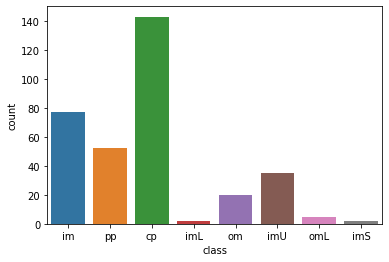

In [23]:
# Plot diagnosis frequencies
sns.countplot ( ecoli_data_category_variables_only [ 'class' ],label = "Count" ) # boxplot

In [24]:
def describe_by_category ( data, numeric, categorical, transpose = False ):
    grouped = data.groupby ( categorical )
    grouped_y = grouped [ numeric ].describe()
    if transpose:
        print( grouped_y.transpose() )
    else:
        print ( grouped_y )

In [25]:
# Descriptive Statistics: Describe each variable by class (means only)
ecoli_data_category_variables_only.groupby ( [ 'class' ] )[ 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2' ].mean()

,mcg,gvh,lip,chg,aac,alm1,alm2
class,,,,,,,
cp,0.363566,0.409720,0.480000,0.50,0.454476,0.312657,0.395245
im,0.478442,0.496623,0.486753,0.50,0.536104,0.757532,0.730390
imL,0.725000,0.470000,1.000000,0.75,0.455000,0.645000,0.570000
imS,0.740000,0.510000,0.480000,0.50,0.535000,0.640000,0.570000
imU,0.726000,0.458857,0.494857,0.50,0.558857,0.744000,0.748000
om,0.672500,0.710000,0.506000,0.50,0.739000,0.462500,0.305500
omL,0.698000,0.512000,1.000000,0.50,0.542000,0.564000,0.222000
pp,0.652115,0.699808,0.480000,0.50,0.436731,0.468077,0.374423


In [26]:
# Descriptive Statistics: Describe each variable by class
ecoli_data_category_variables_only.groupby ( [ 'class' ] )[ 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2' ].describe()

mcg                                                           gvh  \
       count      mean       std   min     25%    50%     75%   max  count   
class                                                                        
cp     143.0  0.363566  0.123826  0.00  0.2700  0.360  0.4400  0.67  143.0   
im      77.0  0.478442  0.194511  0.00  0.3400  0.490  0.6300  0.89   77.0   
imL      2.0  0.725000  0.035355  0.70  0.7125  0.725  0.7375  0.75    2.0   
imS      2.0  0.740000  0.155563  0.63  0.6850  0.740  0.7950  0.85    2.0   
imU     35.0  0.726000  0.108552  0.47  0.6400  0.760  0.8100  0.88   35.0   
om      20.0  0.672500  0.069424  0.52  0.6300  0.675  0.7325  0.78   20.0   
omL      5.0  0.698000  0.044385  0.66  0.6700  0.680  0.7100  0.77    5.0   
pp      52.0  0.652115  0.090344  0.29  0.6300  0.670  0.7000  0.76   52.0   

                 ...    alm1         alm2                                    \
           mean  ...     75%   max  count      mean       std   min     25%   
class            ...                                                          
cp     0.409720  ...  0.3700  0.55  143.0  0.395245  0.096062  0.00  0.3500   
im     0.496623  ...  0.8200  1.00   77.0  0.730390  0.166682  0.17  0.6900   
imL    0.470000  ...  0.7325  0.82    2.0  0.570000  0.381838  0.30  0.4350   
imS    0.510000  ...  0.7000  0.76    2.0  0.570000  0.311127  0.35  0.4600   
imU    0.458857  ...  0.7800  0.92   35.0  0.748000  0.095542  0.33  0.7200   
om     0.710000  ...  0.5400  0.59   20.0  0.305500  0.083884  0.15  0.2675   
omL    0.512000  ...  0.5800  0.59    5.0  0.222000  0.138996  0.01  0.1600   
pp     0.699808  ...  0.5125  0.84   52.0  0.374423  0.118262  0.19  0.3075   

                            
         50%     75%   max  
class                       
cp     0.400  0.4400  0.61  
im     0.780  0.8200  0.99  
imL    0.570  0.7050  0.84  
imS    0.570  0.6800  0.79  
imU    0.760  0.7900  0.90  
om     0.290  0.3375  0.52  
omL    0.280  0.3000  0.36  
pp     0.375  0.4225  0.85  

[8 rows x 56 columns]

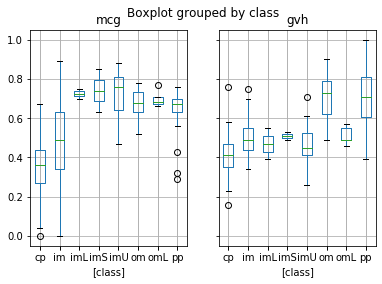

In [27]:
boxplot = ecoli_data_category_variables_only.boxplot ( column = [ 'mcg', 'gvh'], by = [ 'class' ] )

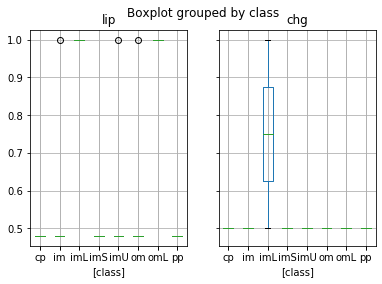

In [28]:
boxplot = ecoli_data_category_variables_only.boxplot ( column = [ 'lip', 'chg' ], by = [ 'class' ] )

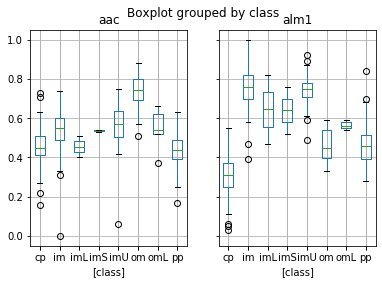

In [29]:
boxplot = ecoli_data_category_variables_only.boxplot ( column = [ 'aac', 'alm1' ], by = [ 'class' ] )

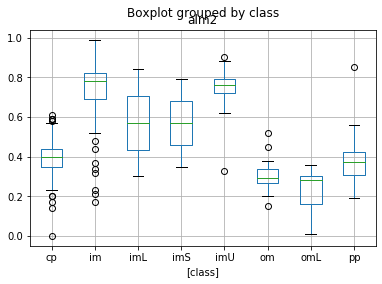

In [30]:
boxplot = ecoli_data_category_variables_only.boxplot ( column = [ 'alm2' ], by = [ 'class' ] )

In [31]:
# Descriptive Statistics: mcg by Class
describe_by_category ( ecoli_data_category_variables_only, "mcg", "class", transpose = True ) 

class          cp         im       imL       imS        imU         om  \
count  143.000000  77.000000  2.000000  2.000000  35.000000  20.000000   
mean     0.363566   0.478442  0.725000  0.740000   0.726000   0.672500   
std      0.123826   0.194511  0.035355  0.155563   0.108552   0.069424   
min      0.000000   0.000000  0.700000  0.630000   0.470000   0.520000   
25%      0.270000   0.340000  0.712500  0.685000   0.640000   0.630000   
50%      0.360000   0.490000  0.725000  0.740000   0.760000   0.675000   
75%      0.440000   0.630000  0.737500  0.795000   0.810000   0.732500   
max      0.670000   0.890000  0.750000  0.850000   0.880000   0.780000   

class       omL         pp  
count  5.000000  52.000000  
mean   0.698000   0.652115  
std    0.044385   0.090344  
min    0.660000   0.290000  
25%    0.670000   0.630000  
50%    0.680000   0.670000  
75%    0.710000   0.700000  
max    0.770000   0.760000  


In [32]:
# Descriptive Statistics: gvh Size by Class
describe_by_category ( ecoli_data_category_variables_only, "gvh", "class", transpose = True )

class          cp         im       imL       imS        imU         om  \
count  143.000000  77.000000  2.000000  2.000000  35.000000  20.000000   
mean     0.409720   0.496623  0.470000  0.510000   0.458857   0.710000   
std      0.089584   0.088342  0.113137  0.028284   0.092124   0.119956   
min      0.160000   0.340000  0.390000  0.490000   0.260000   0.490000   
25%      0.350000   0.440000  0.430000  0.500000   0.410000   0.620000   
50%      0.410000   0.490000  0.470000  0.510000   0.450000   0.730000   
75%      0.470000   0.550000  0.510000  0.520000   0.525000   0.787500   
max      0.760000   0.750000  0.550000  0.530000   0.710000   0.900000   

class       omL         pp  
count  5.000000  52.000000  
mean   0.512000   0.699808  
std    0.046043   0.129122  
min    0.460000   0.390000  
25%    0.490000   0.607500  
50%    0.490000   0.710000  
75%    0.550000   0.810000  
max    0.570000   1.000000  


In [33]:
# Descriptive Statistics: Lip by Class
describe_by_category ( ecoli_data_category_variables_only, "lip", "class", transpose = True )

class            cp         im  imL   imS        imU         om  omL  \
count  1.430000e+02  77.000000  2.0  2.00  35.000000  20.000000  5.0   
mean   4.800000e-01   0.486753  1.0  0.48   0.494857   0.506000  1.0   
std    1.002713e-15   0.059259  0.0  0.00   0.087896   0.116276  0.0   
min    4.800000e-01   0.480000  1.0  0.48   0.480000   0.480000  1.0   
25%    4.800000e-01   0.480000  1.0  0.48   0.480000   0.480000  1.0   
50%    4.800000e-01   0.480000  1.0  0.48   0.480000   0.480000  1.0   
75%    4.800000e-01   0.480000  1.0  0.48   0.480000   0.480000  1.0   
max    4.800000e-01   1.000000  1.0  0.48   1.000000   1.000000  1.0   

class            pp  
count  5.200000e+01  
mean   4.800000e-01  
std    3.923692e-16  
min    4.800000e-01  
25%    4.800000e-01  
50%    4.800000e-01  
75%    4.800000e-01  
max    4.800000e-01  


In [34]:
# Descriptive Statistics: Chg by Class
describe_by_category ( ecoli_data_category_variables_only, "chg", "class", transpose = True )

class     cp    im       imL  imS   imU    om  omL    pp
count  143.0  77.0  2.000000  2.0  35.0  20.0  5.0  52.0
mean     0.5   0.5  0.750000  0.5   0.5   0.5  0.5   0.5
std      0.0   0.0  0.353553  0.0   0.0   0.0  0.0   0.0
min      0.5   0.5  0.500000  0.5   0.5   0.5  0.5   0.5
25%      0.5   0.5  0.625000  0.5   0.5   0.5  0.5   0.5
50%      0.5   0.5  0.750000  0.5   0.5   0.5  0.5   0.5
75%      0.5   0.5  0.875000  0.5   0.5   0.5  0.5   0.5
max      0.5   0.5  1.000000  0.5   0.5   0.5  0.5   0.5


In [35]:
# Descriptive Statistics: Aac by Class
describe_by_category ( ecoli_data_category_variables_only, "aac", "class", transpose = True )

class          cp         im       imL       imS        imU         om  \
count  143.000000  77.000000  2.000000  2.000000  35.000000  20.000000   
mean     0.454476   0.536104  0.455000  0.535000   0.558857   0.739000   
std      0.087923   0.114123  0.077782  0.007071   0.114783   0.093915   
min      0.160000   0.000000  0.400000  0.530000   0.060000   0.510000   
25%      0.410000   0.490000  0.427500  0.532500   0.505000   0.695000   
50%      0.450000   0.550000  0.455000  0.535000   0.570000   0.745000   
75%      0.510000   0.600000  0.482500  0.537500   0.635000   0.800000   
max      0.730000   0.740000  0.510000  0.540000   0.750000   0.880000   

class       omL         pp  
count  5.000000  52.000000  
mean   0.542000   0.436731  
std    0.111893   0.085606  
min    0.370000   0.170000  
25%    0.520000   0.390000  
50%    0.540000   0.440000  
75%    0.620000   0.490000  
max    0.660000   0.630000  


In [36]:
# Descriptive Statistics: Alm1 by Class
describe_by_category ( ecoli_data_category_variables_only, "alm1", "class", transpose = True )

class          cp         im       imL       imS        imU         om  \
count  143.000000  77.000000  2.000000  2.000000  35.000000  20.000000   
mean     0.312657   0.757532  0.645000  0.640000   0.744000   0.462500   
std      0.099215   0.103239  0.247487  0.169706   0.084338   0.085771   
min      0.030000   0.390000  0.470000  0.520000   0.490000   0.330000   
25%      0.250000   0.700000  0.557500  0.580000   0.710000   0.397500   
50%      0.310000   0.760000  0.645000  0.640000   0.750000   0.450000   
75%      0.370000   0.820000  0.732500  0.700000   0.780000   0.540000   
max      0.550000   1.000000  0.820000  0.760000   0.920000   0.590000   

class       omL         pp  
count  5.000000  52.000000  
mean   0.564000   0.468077  
std    0.020736   0.100996  
min    0.540000   0.280000  
25%    0.550000   0.390000  
50%    0.560000   0.460000  
75%    0.580000   0.512500  
max    0.590000   0.840000  


In [37]:
# Descriptive Statistics: Alm2 by Class
describe_by_category ( ecoli_data_category_variables_only, "alm2", "class", transpose = True )

class          cp         im       imL       imS        imU         om  \
count  143.000000  77.000000  2.000000  2.000000  35.000000  20.000000   
mean     0.395245   0.730390  0.570000  0.570000   0.748000   0.305500   
std      0.096062   0.166682  0.381838  0.311127   0.095542   0.083884   
min      0.000000   0.170000  0.300000  0.350000   0.330000   0.150000   
25%      0.350000   0.690000  0.435000  0.460000   0.720000   0.267500   
50%      0.400000   0.780000  0.570000  0.570000   0.760000   0.290000   
75%      0.440000   0.820000  0.705000  0.680000   0.790000   0.337500   
max      0.610000   0.990000  0.840000  0.790000   0.900000   0.520000   

class       omL         pp  
count  5.000000  52.000000  
mean   0.222000   0.374423  
std    0.138996   0.118262  
min    0.010000   0.190000  
25%    0.160000   0.307500  
50%    0.280000   0.375000  
75%    0.300000   0.422500  
max    0.360000   0.850000  


## KNN: Ecoli Data

We know the Ecoli Data Set is used to classify localization sites of proteins in ecoli cells. As this is a classification problem, we know we'll need to use the KNN Classifier

### Assign Feature Matrix & Target Vector

In [38]:
# Assign Variables
# X = Feature Matrix; All Attributes (i.e., drop instance class column)
# y = Target Vector; Categorical instance class (i.e., doesn't include the attribute features)
X = ecoli_data_category_variables_only.drop ( axis = 1, labels = "class" ).values
y = ecoli_data_category_variables_only [ "class" ].astype( "category" ).cat.codes.values

### K-Nearest Neighbors Classification

In [39]:
# Classify k-Nearest Neighbors

# Log Experiment: Standard KNN Classification
logger.info ( "Running Standard KNN Classification: Ecoli Data" )

# Run Experiment: Standardize data, fit model (split X & y; use training data set), make predictions (split X & y; use test data set)
run_experiment (
        X,
        y,
        model_call = lambda k: KNearestNeighbors ( k = k ),
        param_grid = { "k": [ 1, 2, 3, 4, 5 ] },
    )

In [40]:
# Reduce Error & Improve Cost
# Edited KNN (reduce training set)

# Log Experiment: Edited KNN ()
logger.info ( "Running Edited KNN: Ecoli Data" )

np.random.seed ( 6222020 )

# Run Experiment: Standardize data, fit model (split X & y; use training data set), make predictions (split X & y; use test data set)
run_experiment (
        X,
        y,
        model_call = lambda k: EditedKNN ( k = k, proportion_cv = 0.1 ),
        param_grid = { "k": [ 1, 2, 3, 4, 5 ] },
    )

In [41]:
# Improve Cost
# Condensed KNN (Reduced dataset)

# Log Experiment: Condensed KNN
logger.info ( "Running Condensed KNN: Ecoli Data" )

np.random.seed ( 6222020 )

# Run Experiment: Standardize data, fit model (split X & y; use training data set), make predictions (split X & y; use test data set)
model = run_experiment ( X, y, model_call = lambda k: CondensedKNN ( verbose = True ) )

# Image Segmentation Data Set
## Extract, Transform, Load: Image Segmentation Data

### Description

[Classification] The instances were drawn randomly from a database of 7 outdoor images. The images
were handsegmented to create a classification for every pixel.

Data obtained from:https://archive.ics.uci.edu/ml/datasets/Image+Segmentation

### Attribute Information: 19 Attributes (d)

1. region-centroid-col: the column of the center pixel of the region. 
2. region-centroid-row: the row of the center pixel of the region. 
3. region-pixel-count: the number of pixels in a region = 9. 
4. short-line-density-5: the results of a line extractoin algorithm that counts how many lines of length 5 (any orientation) with low contrast, less than or equal to 5, go through the region. 
5. short-line-density-2: same as short-line-density-5 but counts lines of high contrast, greater than 5. 
6. vedge-mean: measure the contrast of horizontally adjacent pixels in the region. There are 6, the mean and standard deviation are given. This attribute is used as a vertical edge detector. 
7. vegde-sd: (see 6) 
8. hedge-mean: measures the contrast of vertically adjacent pixels. Used for horizontal line detection. 
9. hedge-sd: (see 8). 
10. intensity-mean: the average over the region of (R + G + B)/3 
11. rawred-mean: the average over the region of the R value. 
12. rawblue-mean: the average over the region of the B value. 
13. rawgreen-mean: the average over the region of the G value. 
14. exred-mean: measure the excess red: (2R - (G + B)) 
15. exblue-mean: measure the excess blue: (2B - (G + R)) 
16. exgreen-mean: measure the excess green: (2G - (R + B)) 
17. value-mean: 3-d nonlinear transformation of RGB. (Algorithm can be found in Foley and VanDam, Fundamentals of Interactive Computer Graphics) 
18. saturatoin-mean: (see 17) 
19. hue-mean: (see 17)

### One Class Label
20. class (class attribute) 

In [42]:
# Log ETL: Image Segmentation Data
logger.info ( "ETL: Image Segmentation Data Set" )

# Read Image Segmentation Data
# Create dataframe
image_segmentation_data = pipe (
        r.get (
            "https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.data"
        ).text.split ( "\n" ),
        lambda lines: pd.read_csv (
            io.StringIO ( "\n".join ( lines [ 5: ] ) ), header = None, names = lines [ 3 ].split ( "," ) ),
        lambda df: df.assign (
            instance_class = lambda df: df.index.to_series().astype ( "category" ).cat.codes
        ), )

In [43]:
# Confirm data was properly read by examining data frame
image_segmentation_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, BRICKFACE to GRASS
Data columns (total 20 columns):
REGION-CENTROID-COL     210 non-null float64
REGION-CENTROID-ROW     210 non-null float64
REGION-PIXEL-COUNT      210 non-null int64
SHORT-LINE-DENSITY-5    210 non-null float64
SHORT-LINE-DENSITY-2    210 non-null float64
VEDGE-MEAN              210 non-null float64
VEDGE-SD                210 non-null float64
HEDGE-MEAN              210 non-null float64
HEDGE-SD                210 non-null float64
INTENSITY-MEAN          210 non-null float64
RAWRED-MEAN             210 non-null float64
RAWBLUE-MEAN            210 non-null float64
RAWGREEN-MEAN           210 non-null float64
EXRED-MEAN              210 non-null float64
EXBLUE-MEAN             210 non-null float64
EXGREEN-MEAN            210 non-null float64
VALUE-MEAN              210 non-null float64
SATURATION-MEAN         210 non-null float64
HUE-MEAN                210 non-null float64
instance_class          210 non-null 

**Notes**

As expected, we see 20 columns (19 attributes & one class instance). There are 210 entries (n = 210). We see that the attribute/feature REGION-PIXEL-COUNT is an integer, but all other attributes are float type variables. 

In [44]:
# Look at first few rows of dataframe
image_segmentation_data.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,instance_class
BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,0
BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,0
BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,0
BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,0
BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,0


In [45]:
# Verify whether any values are null
image_segmentation_data.isnull().values.any()

False

In [46]:
# Again
image_segmentation_data.isna().any()

REGION-CENTROID-COL     False
REGION-CENTROID-ROW     False
REGION-PIXEL-COUNT      False
SHORT-LINE-DENSITY-5    False
SHORT-LINE-DENSITY-2    False
VEDGE-MEAN              False
VEDGE-SD                False
HEDGE-MEAN              False
HEDGE-SD                False
INTENSITY-MEAN          False
RAWRED-MEAN             False
RAWBLUE-MEAN            False
RAWGREEN-MEAN           False
EXRED-MEAN              False
EXBLUE-MEAN             False
EXGREEN-MEAN            False
VALUE-MEAN              False
SATURATION-MEAN         False
HUE-MEAN                False
instance_class          False
dtype: bool

## (Brief) Exploratory Data Analysis: Image Segmentation Data

### Single Variables

Let's look at the summary statistics & Tukey's 5

In [47]:
# Log EDA: Image Segmentation Data
logger.info ( "EDA: Image Segmentation Data Set" )

# Descriptive Statistics
image_segmentation_data.describe()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,instance_class
count,210.000000,210.000000,210.0,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,124.647619,122.757143,9.0,0.008466,0.006349,1.925132,5.719529,2.604233,11.638377,37.091005,32.967725,44.011112,34.294180,-12.369841,20.760317,-8.390476,44.888360,0.423230,-1.340397,3.000000
std,74.104024,58.139686,0.0,0.029549,0.030077,3.158211,43.495942,4.798268,97.390023,38.677168,35.540563,43.804447,37.057003,11.559599,18.761842,11.003746,43.235182,0.227333,1.559405,2.004779
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-48.222220,-9.666667,-30.555555,0.000000,0.000000,-2.530950,0.000000
25%,60.500000,81.500000,9.0,0.000000,0.000000,0.666667,0.400921,0.777779,0.410816,6.453704,7.000000,8.277778,3.805555,-18.111110,4.111111,-15.750000,10.527778,0.275722,-2.187112,1.000000
50%,123.500000,121.500000,9.0,0.000000,0.000000,1.222222,0.828695,1.388889,0.913176,21.314816,18.611112,26.833334,20.000000,-10.333333,19.555556,-9.888889,28.388890,0.365455,-2.044163,3.000000
75%,189.750000,174.500000,9.0,0.000000,0.000000,1.888890,1.676634,2.597221,1.980485,52.629629,46.750000,64.194447,46.472223,-4.666666,34.333332,-3.722222,64.194447,0.539738,-1.429800,5.000000
max,252.000000,250.000000,9.0,0.111111,0.222222,25.500000,572.996400,44.722225,1386.329200,143.444440,136.888890,150.888890,142.555560,5.777778,78.777780,21.888890,150.888890,1.000000,2.864931,6.000000


**Notes** 

Total number of observations: 210 (i.e., n = 210)

Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$

We'll likely want to discretize these attributes by class

## (Brief) Exploratory Data Analysis: Image Segmentation Data

### Pair-Wise: Attribute by Class

In [48]:
# Rename column
image_segmentation_data.rename ( columns = { "instance_class":"class" }, inplace = True )

In [49]:
# Frequency of glass classifications
image_segmentation_data [ 'class' ].value_counts() # raw counts

6    30
5    30
4    30
3    30
2    30
1    30
0    30
Name: class, dtype: int64

**Notes**

There are 7 image segmentation classifications (labeled 0, 1, 2, 3, .., 7)

Each image segmentation classification has 30 observations 


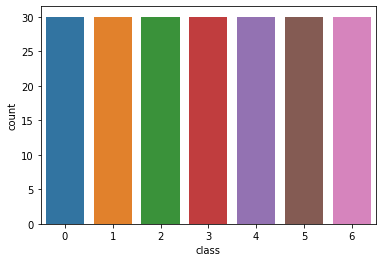

In [50]:
# Plot diagnosos frequencies
sns.countplot ( image_segmentation_data [ 'class' ],label = "Count" ) # boxplot

**Notes**

There are 7 image segmentation classifications (labeled 0, 1, 2, 3, .., 7)

Each image segmentation classification has 30 observations 

In [51]:
# Get column names
print ( image_segmentation_data.columns )

Index(['REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT',
       'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN',
       'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN',
       'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN',
       'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN', 'class'],
      dtype='object')


In [52]:
# Descriptive Statistics: Describe each variable by class (means only)
image_segmentation_data.groupby ( [ 'class' ] )[ 'REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT',
       'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN',
       'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN',
       'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN',
       'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN' ].mean()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
class,,,,,,,,,,,,,,,,,,,
0,83.400000,109.333333,9,0.003704,0.000000,1.037037,1.030864,1.337037,0.851605,13.165432,13.611111,16.577778,9.307408,1.337037,10.237037,-11.574074,16.866667,0.488673,-1.298357
1,150.500000,97.166667,9,0.007407,0.007407,2.951852,2.435264,2.564815,3.792083,43.546914,39.048148,53.318518,38.274074,-13.496296,29.314814,-15.818518,53.318518,0.304401,-2.016035
2,76.500000,111.400000,9,0.003704,0.014815,3.827778,30.905793,5.290741,58.966017,10.992592,7.781482,15.848148,9.348148,-9.633333,14.566667,-4.933333,15.892592,0.761842,-2.245616
3,130.700000,203.500000,9,0.025926,0.000000,1.507407,1.973017,2.142593,2.064246,14.977778,11.911111,13.614815,19.407407,-9.200000,-4.088889,13.288889,19.418519,0.410565,2.287770
4,150.166667,187.233333,9,0.011111,0.022222,2.400000,2.118180,4.620370,10.015903,49.491358,43.992593,61.225927,43.255556,-16.496296,35.203704,-18.707407,61.229631,0.295645,-2.069752
5,116.400000,45.866667,9,0.007407,0.000000,0.831481,0.580651,1.137037,0.798594,119.069135,108.018520,135.174076,114.014814,-33.151852,48.314815,-15.162963,135.174076,0.205044,-2.324039
6,164.866667,104.800000,9,0.000000,0.000000,0.920370,0.992935,1.137037,4.980188,8.393827,6.411111,12.318519,6.451852,-5.948148,11.774074,-5.825926,12.318519,0.496441,-1.716752


In [53]:
# Descriptive Statistics: Describe each variable by class (all variables)
image_segmentation_data.groupby ( [ 'class' ] ) [ 'REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT',
       'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN',
       'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN',
       'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN',
       'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN' ].describe()        

REGION-CENTROID-COL                                                      \
                    count        mean        std   min     25%    50%     75%   
class                                                                           
0                    30.0   83.400000  63.719536   2.0   23.00   82.5  133.75   
1                    30.0  150.500000  64.834404  14.0  121.00  162.5  195.50   
2                    30.0   76.500000  63.572793   1.0   37.25   59.0   99.25   
3                    30.0  130.700000  80.616654   2.0   62.25  110.0  203.00   
4                    30.0  150.166667  74.075490   4.0   92.25  159.0  211.75   
5                    30.0  116.400000  58.638342   7.0   70.25  121.0  155.00   
6                    30.0  164.866667  67.389109  20.0  127.75  187.5  219.00   

             REGION-CENTROID-ROW              ... SATURATION-MEAN            \
         max               count        mean  ...             75%       max   
class                                         ...                             
0      229.0                30.0  109.333333  ...        0.558929  0.600529   
1      243.0                30.0   97.166667  ...        0.328997  0.503086   
2      231.0                30.0  111.400000  ...        0.966527  1.000000   
3      242.0                30.0  203.500000  ...        0.446163  0.593150   
4      252.0                30.0  187.233333  ...        0.307032  0.318137   
5      228.0                30.0   45.866667  ...        0.247667  0.362062   
6      252.0                30.0  104.800000  ...        0.664947  0.977778   

      HUE-MEAN                                                              \
         count      mean       std       min       25%       50%       75%   
class                                                                        
0         30.0 -1.298357  0.369146 -1.985703 -1.617118 -1.246602 -0.995541   
1         30.0 -2.016035  0.112343 -2.237972 -2.103675 -2.018119 -1.964688   
2         30.0 -2.245616  0.166026 -2.530950 -2.359557 -2.235901 -2.151303   
3         30.0  2.287770  0.269387  1.756645  2.100468  2.310683  2.452260   
4         30.0 -2.069752  0.110092 -2.517490 -2.082760 -2.048251 -2.006819   
5         30.0 -2.324039  0.089314 -2.521648 -2.376067 -2.338527 -2.266181   
6         30.0 -1.716752  0.786907 -2.202667 -2.128733 -2.053348 -1.924017   

                 
            max  
class            
0     -0.570940  
1     -1.681589  
2     -1.702833  
3      2.864931  
4     -1.947472  
5     -2.097815  
6      0.000000  

[7 rows x 152 columns]

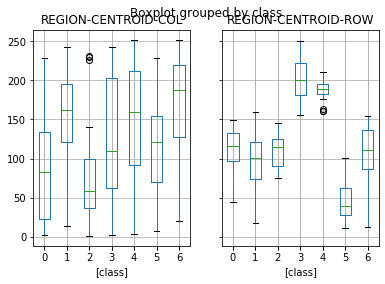

In [54]:
boxplot = image_segmentation_data.boxplot ( column = [ 'REGION-CENTROID-COL', 'REGION-CENTROID-ROW' ], by = [ 'class' ] )  

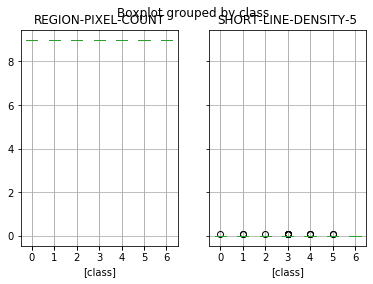

In [55]:
boxplot = image_segmentation_data.boxplot ( column = [ 'REGION-PIXEL-COUNT','SHORT-LINE-DENSITY-5' ], by = [ 'class' ] )

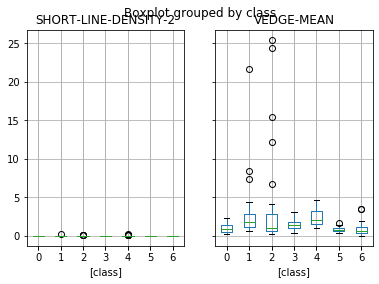

In [56]:
boxplot = image_segmentation_data.boxplot ( column = [ 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN' ], by = [ 'class' ] )

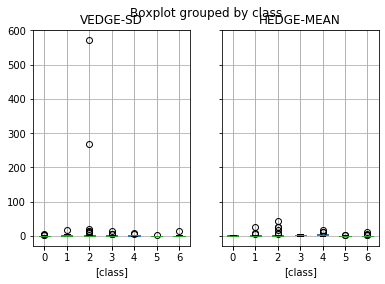

In [57]:
boxplot = image_segmentation_data.boxplot ( column = [ 'VEDGE-SD', 'HEDGE-MEAN' ], by = [ 'class' ] )

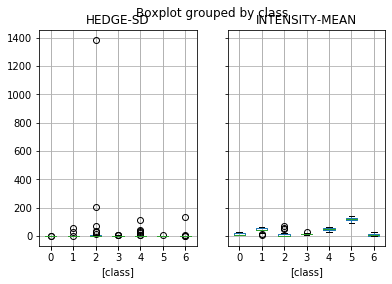

In [58]:
boxplot = image_segmentation_data.boxplot ( column = [ 'HEDGE-SD', 'INTENSITY-MEAN'], by = [ 'class' ] )

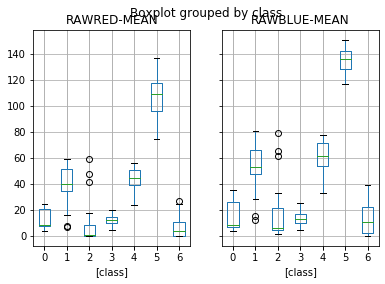

In [59]:
boxplot = image_segmentation_data.boxplot ( column = [ 'RAWRED-MEAN','RAWBLUE-MEAN' ], by = [ 'class' ] )

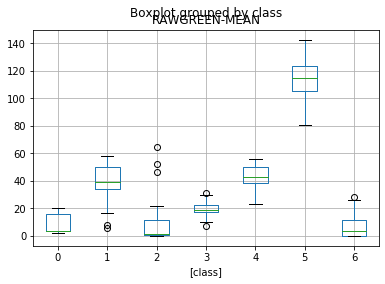

In [60]:
boxplot = image_segmentation_data.boxplot ( column = [ 'RAWGREEN-MEAN' ], by = [ 'class' ] )

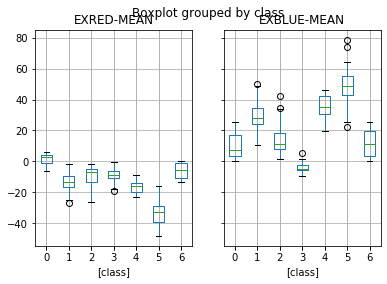

In [61]:
boxplot = image_segmentation_data.boxplot ( column = [ 'EXRED-MEAN', 'EXBLUE-MEAN' ], by = [ 'class' ] )

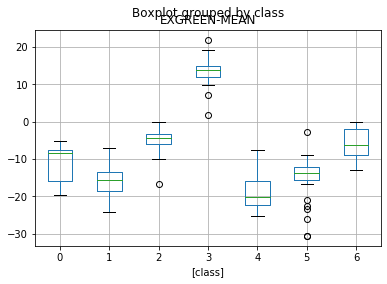

In [62]:
boxplot = image_segmentation_data.boxplot ( column = [ 'EXGREEN-MEAN'], by = [ 'class' ] )

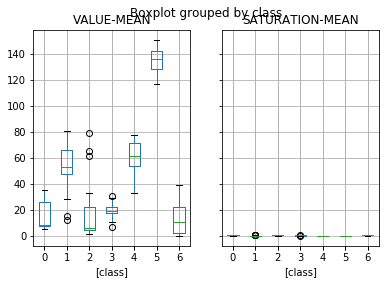

In [63]:
boxplot = image_segmentation_data.boxplot ( column = [ 'VALUE-MEAN', 'SATURATION-MEAN' ], by = [ 'class' ] )

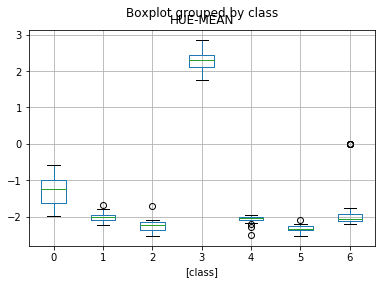

In [64]:
boxplot = image_segmentation_data.boxplot ( column = [ 'HUE-MEAN' ], by = [ 'class' ] )

In [65]:
# Descriptive Statistics: Describe each variable by class
# REGION-CENTROID-COL by Class
describe_by_category ( image_segmentation_data, 'REGION-CENTROID-COL', "class", transpose = True )

class           0           1           2           3           4           5  \
count   30.000000   30.000000   30.000000   30.000000   30.000000   30.000000   
mean    83.400000  150.500000   76.500000  130.700000  150.166667  116.400000   
std     63.719536   64.834404   63.572793   80.616654   74.075490   58.638342   
min      2.000000   14.000000    1.000000    2.000000    4.000000    7.000000   
25%     23.000000  121.000000   37.250000   62.250000   92.250000   70.250000   
50%     82.500000  162.500000   59.000000  110.000000  159.000000  121.000000   
75%    133.750000  195.500000   99.250000  203.000000  211.750000  155.000000   
max    229.000000  243.000000  231.000000  242.000000  252.000000  228.000000   

class           6  
count   30.000000  
mean   164.866667  
std     67.389109  
min     20.000000  
25%    127.750000  
50%    187.500000  
75%    219.000000  
max    252.000000  


In [66]:
# Descriptive Statistics: Describe each variable by class
# REGION-CENTROID-ROW by Class
describe_by_category ( image_segmentation_data, 'REGION-CENTROID-ROW', "class", transpose = True )

class           0           1          2           3           4           5  \
count   30.000000   30.000000   30.00000   30.000000   30.000000   30.000000   
mean   109.333333   97.166667  111.40000  203.500000  187.233333   45.866667   
std     29.039015   38.979290   21.46304   26.694633   11.527129   25.605405   
min     44.000000   17.000000   75.00000  156.000000  161.000000   11.000000   
25%     96.500000   74.250000   90.25000  181.500000  182.250000   27.500000   
50%    116.000000  100.500000  115.00000  200.000000  189.000000   39.500000   
75%    132.000000  120.750000  125.00000  222.500000  194.750000   62.000000   
max    149.000000  160.000000  145.00000  250.000000  210.000000  101.000000   

class           6  
count   30.000000  
mean   104.800000  
std     39.304646  
min     12.000000  
25%     86.000000  
50%    110.500000  
75%    136.250000  
max    155.000000  


In [67]:
# Descriptive Statistics: Describe each variable by class
# REGION-PIXEL-COUNT by Class
describe_by_category ( image_segmentation_data, 'REGION-PIXEL-COUNT', "class", transpose = True )

class     0     1     2     3     4     5     6
count  30.0  30.0  30.0  30.0  30.0  30.0  30.0
mean    9.0   9.0   9.0   9.0   9.0   9.0   9.0
std     0.0   0.0   0.0   0.0   0.0   0.0   0.0
min     9.0   9.0   9.0   9.0   9.0   9.0   9.0
25%     9.0   9.0   9.0   9.0   9.0   9.0   9.0
50%     9.0   9.0   9.0   9.0   9.0   9.0   9.0
75%     9.0   9.0   9.0   9.0   9.0   9.0   9.0
max     9.0   9.0   9.0   9.0   9.0   9.0   9.0


In [68]:
# Descriptive Statistics: Describe each variable by class
# SHORT-LINE-DENSITY-5 by Class
describe_by_category ( image_segmentation_data, 'SHORT-LINE-DENSITY-5', "class", transpose = True )

class          0          1          2          3          4          5     6
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000  30.0
mean    0.003704   0.007407   0.003704   0.025926   0.011111   0.007407   0.0
std     0.020286   0.028190   0.020286   0.047798   0.033903   0.028190   0.0
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.0
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.0
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.0
75%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.0
max     0.111111   0.111111   0.111111   0.111111   0.111111   0.111111   0.0


In [69]:
# Descriptive Statistics: Describe each variable by class
# SHORT-LINE-DENSITY-2 by Class
describe_by_category ( image_segmentation_data, 'SHORT-LINE-DENSITY-2', "class", transpose = True )

class     0          1          2     3          4     5     6
count  30.0  30.000000  30.000000  30.0  30.000000  30.0  30.0
mean    0.0   0.007407   0.014815   0.0   0.022222   0.0   0.0
std     0.0   0.040572   0.038416   0.0   0.053804   0.0   0.0
min     0.0   0.000000   0.000000   0.0   0.000000   0.0   0.0
25%     0.0   0.000000   0.000000   0.0   0.000000   0.0   0.0
50%     0.0   0.000000   0.000000   0.0   0.000000   0.0   0.0
75%     0.0   0.000000   0.000000   0.0   0.000000   0.0   0.0
max     0.0   0.222222   0.111111   0.0   0.222222   0.0   0.0


In [70]:
# Descriptive Statistics: Describe each variable by class
# VEDGE-MEAN by Class
describe_by_category ( image_segmentation_data, 'VEDGE-MEAN', "class", transpose = True )

class          0          1          2          3          4          5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean    1.037037   2.951852   3.827778   1.507407   2.400000   0.831481   
std     0.612821   3.973189   6.696062   0.736122   1.053325   0.315447   
min     0.277778   0.666667   0.222222   0.444444   1.055555   0.333335   
25%     0.513889   1.138889   0.666667   1.013889   1.611112   0.611111   
50%     0.888889   1.861112   0.972222   1.444444   2.055556   0.777775   
75%     1.486111   2.861112   2.916666   1.861111   3.263890   1.000001   
max     2.277778  21.666666  25.500000   3.055556   4.611111   1.666667   

class          6  
count  30.000000  
mean    0.920370  
std     0.887173  
min     0.000000  
25%     0.347222  
50%     0.694444  
75%     1.194445  
max     3.444445  


In [71]:
# Descriptive Statistics: Describe each variable by class
# VEDGE-SD by Class
describe_by_category ( image_segmentation_data, 'VEDGE-SD', "class", transpose = True )

class          0          1           2          3          4          5  \
count  30.000000  30.000000   30.000000  30.000000  30.000000  30.000000   
mean    1.030864   2.435264   30.905793   1.973017   2.118180   0.580651   
std     1.266567   3.294970  113.297318   3.045898   1.499503   0.343513   
min     0.018518   0.177777    0.029630   0.077778   0.729634   0.029629   
25%     0.166667   0.775397    0.229630   0.554629   1.152977   0.354495   
50%     0.503704   1.247911    0.702768   0.890741   1.674422   0.531424   
75%     1.286110   3.459386    3.277777   1.760185   2.283369   0.724997   
max     5.351850  17.362800  572.996400  15.262960   7.662959   1.466670   

class          6  
count  30.000000  
mean    0.992935  
std     2.414415  
min     0.000000  
25%     0.256235  
50%     0.438528  
75%     0.957971  
max    13.496301  


In [72]:
# Descriptive Statistics: Describe each variable by class
# 'HEDGE-MEAN' by Class
describe_by_category ( image_segmentation_data, 'HEDGE-MEAN', "class", transpose = True )

class          0          1          2          3          4          5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean    1.337037   2.564815   5.290741   2.142593   4.620370   1.137037   
std     0.804009   4.767299  10.265533   0.945704   3.623691   0.619626   
min     0.333333   0.666667   0.111111   0.611111   1.277779   0.388892   
25%     0.680556   0.958334   0.791667   1.444444   2.430556   0.777778   
50%     1.055556   1.305556   1.194444   2.055556   3.416666   0.944445   
75%     1.777778   2.000000   2.666667   2.791667   5.069444   1.375001   
max     2.944444  26.444445  44.722225   4.722222  18.166666   2.888891   

class          6  
count  30.000000  
mean    1.137037  
std     2.180535  
min     0.000000  
25%     0.222222  
50%     0.472222  
75%     0.888889  
max    10.777778  


In [73]:
# Descriptive Statistics: Describe each variable by class
# HEDGE-SD by Class
describe_by_category ( image_segmentation_data, 'HEDGE-SD', "class", transpose = True )

class          0          1            2          3           4          5  \
count  30.000000  30.000000    30.000000  30.000000   30.000000  30.000000   
mean    0.851605   3.792083    58.966017   2.064246   10.015903   0.798594   
std     0.816941  11.456546   253.733905   1.735255   22.331095   0.883829   
min     0.077778   0.296295     0.029630   0.389683    1.088663   0.077778   
25%     0.302778   0.653459     0.367588   0.822222    1.675492   0.355722   
50%     0.498148   0.870239     1.007407   1.725927    2.333060   0.633333   
75%     1.169444   1.508613     3.632639   2.375320    3.124129   0.916056   
max     3.185185  59.540750  1386.329200   7.599998  114.596340   5.051852   

class           6  
count   30.000000  
mean     4.980188  
std     23.971840  
min      0.000000  
25%      0.156922  
50%      0.344355  
75%      0.673687  
max    131.807390  


In [74]:
# Descriptive Statistics: Describe each variable by class
# INTENSITY-MEAN by Class
describe_by_category ( image_segmentation_data, 'INTENSITY-MEAN', "class", transpose = True )

class          0          1          2          3          4           5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000   30.000000   
mean   13.165432  43.546914  10.992592  14.977778  49.491358  119.069135   
std     8.144303  15.339119  17.288459   5.068777   9.216693   13.331206   
min     3.925926   8.444445   0.518518   6.407407  26.444445   90.629630   
25%     6.037037  39.203704   1.842593  12.629629  43.342593  109.925926   
50%     6.574074  44.814815   2.962963  15.092593  49.611110  119.018520   
75%    21.037038  56.370371  14.759259  17.101852  57.314814  127.907408   
max    26.740740  65.703705  67.444440  25.444445  63.222220  143.444440   

class          6  
count  30.000000  
mean    8.393827  
std     9.120666  
min     0.000000  
25%     0.851852  
50%     6.333333  
75%    14.435186  
max    31.629630  


In [75]:
# Descriptive Statistics: Describe each variable by class
# RAWRED-MEAN by Class
describe_by_category ( image_segmentation_data, 'RAWRED-MEAN', "class", transpose = True )

class          0          1          2          3          4           5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000   30.000000   
mean   13.611111  39.048148   7.781482  11.911111  43.992593  108.018520   
std     7.231603  14.356932  15.142842   4.015127   8.156198   15.846919   
min     4.111111   7.000000   0.000000   4.888889  23.444445   74.555560   
25%     7.361111  34.222223   0.111111   9.805556  38.861113   96.249999   
50%     8.111111  39.944446   0.777778  12.222222  44.555555  109.333333   
75%    20.916666  51.583333   8.666667  14.222223  50.722222  117.750001   
max    24.666666  59.444443  58.777780  20.111110  56.222220  136.888890   

class          6  
count  30.000000  
mean    6.411111  
std     7.672586  
min     0.000000  
25%     0.361111  
50%     4.000000  
75%    10.555556  
max    27.222221  


In [76]:
# Descriptive Statistics: Describe each variable by class
# RAWBLUE-MEAN by Class
describe_by_category ( image_segmentation_data, 'RAWBLUE-MEAN', "class", transpose = True )

class          0          1          2          3          4           5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000   30.000000   
mean   16.577778  53.318518  15.848148  13.614815  61.225927  135.174076   
std    10.671112  17.849442  20.291059   5.599043  11.718477    9.437600   
min     4.000000  12.222222   1.222222   4.666667  33.000000  116.888885   
25%     7.250000  47.805556   4.722222  10.111111  53.805554  128.583337   
50%     8.444444  52.944445   6.388889  13.166666  61.166668  136.277780   
75%    26.472222  66.277777  21.638889  16.583334  71.249998  142.305562   
max    35.222220  80.333336  79.000000  25.444445  77.777780  150.888890   

class          6  
count  30.000000  
mean   12.318519  
std    11.812129  
min     0.000000  
25%     2.055556  
50%    10.888889  
75%    22.416667  
max    39.333336  


In [77]:
# Descriptive Statistics: Describe each variable by class
# RAWGREEN-MEAN by Class
describe_by_category ( image_segmentation_data, 'RAWGREEN-MEAN', "class", transpose = True )

class          0          1          2          3          4           5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000   30.000000   
mean    9.307408  38.274074   9.348148  19.407407  43.255556  114.014814   
std     6.599837  14.084998  16.638744   5.847162   7.841129   14.926777   
min     2.222222   6.111111   0.000000   7.000000  22.888890   80.444440   
25%     3.472222  33.972224   0.500000  17.305556  38.777778  104.944443   
50%     3.833333  39.222222   1.666667  18.888889  43.055555  114.388885   
75%    15.750000  49.805555  11.888889  22.305556  50.194444  123.472225   
max    20.333334  58.222220  64.555560  30.888890  55.666668  142.555560   

class          6  
count  30.000000  
mean    6.451852  
std     8.036419  
min     0.000000  
25%     0.166667  
50%     3.611111  
75%    11.277778  
max    28.333334  


In [78]:
# Descriptive Statistics: Describe each variable by class
# EXRED-MEAN by Class
describe_by_category ( image_segmentation_data, 'EXRED-MEAN', "class", transpose = True )

class          0          1          2          3          4          5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean    1.337037 -13.496296  -9.633333  -9.200000 -16.496296 -33.151852   
std     3.663296   6.091940   7.897338   4.170729   3.716512   8.603487   
min    -6.222222 -26.888890 -26.000000 -19.111110 -23.222221 -48.222220   
25%    -1.222222 -16.277778 -13.305556 -10.944444 -19.777779 -39.416668   
50%     3.055556 -13.444444  -6.722222  -8.944444 -16.111111 -33.000000   
75%     4.166667  -9.444444  -4.666666  -6.055556 -14.027778 -28.805556   
max     5.777778  -1.888889  -1.555556  -0.555556  -9.000000 -15.888889   

class          6  
count  30.000000  
mean   -5.948148  
std     4.900955  
min   -13.555555  
25%   -10.833333  
50%    -5.722222  
75%    -1.305556  
max     0.000000  


In [79]:
# Descriptive Statistics: Describe each variable by class
# EXBLUE-MEAN by Class
describe_by_category ( image_segmentation_data, 'EXBLUE-MEAN', "class", transpose = True )

class          0          1          2          3          4          5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   10.237037  29.314814  14.566667  -4.088889  35.203704  48.314815   
std     7.834100   9.916556  10.821606   3.316484   7.670252  12.531853   
min     0.222222  10.333333   1.777778  -9.666667  19.666666  22.333334   
25%     3.416667  24.249999   7.888889  -5.833333  30.750000  43.083333   
50%     7.444445  28.055556  11.166666  -4.833333  35.277779  48.666666   
75%    17.277777  34.500001  18.361110  -2.083333  42.083332  54.972223   
max    25.444445  50.111110  42.111110   5.222222  46.111110  78.777780   

class          6  
count  30.000000  
mean   11.774074  
std     8.926619  
min     0.000000  
25%     3.361111  
50%    11.000000  
75%    19.500000  
max    25.666666  


In [80]:
# Descriptive Statistics: Describe each variable by class
# EXGREEN-MEAN by Class
describe_by_category ( image_segmentation_data, 'EXGREEN-MEAN', "class", transpose = True )

class          0          1          2          3          4          5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean  -11.574074 -15.818518  -4.933333  13.288889 -18.707407 -15.162963   
std     4.673875   4.445257   3.376048   3.584247   4.662604   6.121985   
min   -19.555555 -24.111110 -16.555555   1.777778 -25.222221 -30.555555   
25%   -15.972221 -18.611111  -5.888889  11.777778 -22.194443 -15.500000   
50%    -8.388889 -15.611111  -4.444445  13.722223 -20.055555 -13.666667   
75%    -7.583333 -13.472222  -3.194445  14.833334 -15.944445 -12.138889   
max    -5.111111  -7.000000  -0.222222  21.888890  -7.666666  -2.666667   

class          6  
count  30.000000  
mean   -5.825926  
std     4.131582  
min   -13.000000  
25%    -8.833334  
50%    -6.333333  
75%    -2.055555  
max     0.000000  


In [81]:
# Descriptive Statistics: Describe each variable by class
# VALUE-MEAN by Class
describe_by_category ( image_segmentation_data, 'VALUE-MEAN', "class", transpose = True )

class          0          1          2          3          4           5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000   30.000000   
mean   16.866667  53.318518  15.892592  19.418519  61.229631  135.174076   
std    10.394451  17.849442  20.307711   5.830418  11.714169    9.437600   
min     5.555555  12.222222   1.222222   7.222222  33.000000  116.888885   
25%     7.777778  47.805556   4.722222  17.305556  53.805554  128.583337   
50%     8.555556  52.944445   6.388889  18.888889  61.166668  136.277780   
75%    26.472222  66.277777  22.638890  22.305556  71.249998  142.305562   
max    35.222220  80.333336  79.000000  30.888890  77.777780  150.888890   

class          6  
count  30.000000  
mean   12.318519  
std    11.812129  
min     0.000000  
25%     2.055556  
50%    10.888889  
75%    22.416667  
max    39.333336  


In [82]:
# Descriptive Statistics: Describe each variable by class
# SATURATION-MEAN by Class
describe_by_category ( image_segmentation_data, 'SATURATION-MEAN', "class", transpose = True )

class          0          1          2          3          4          5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean    0.488673   0.304401   0.761842   0.410565   0.295645   0.205044   
std     0.076974   0.084738   0.245555   0.085215   0.014553   0.064481   
min     0.368848   0.176156   0.251852   0.191049   0.263847   0.092773   
25%     0.409964   0.259029   0.603501   0.352525   0.286199   0.170174   
50%     0.531085   0.275031   0.863626   0.414564   0.298339   0.195374   
75%     0.558929   0.328997   0.966527   0.446163   0.307032   0.247667   
max     0.600529   0.503086   1.000000   0.593150   0.318137   0.362062   

class          6  
count  30.000000  
mean    0.496441  
std     0.279240  
min     0.000000  
25%     0.385351  
50%     0.520172  
75%     0.664947  
max     0.977778  


In [83]:
# Descriptive Statistics: Describe each variable by class
# HUE-MEAN by Class
describe_by_category ( image_segmentation_data, 'HUE-MEAN', "class", transpose = True )

class          0          1          2          3          4          5  \
count  30.000000  30.000000  30.000000  30.000000  30.000000  30.000000   
mean   -1.298357  -2.016035  -2.245616   2.287770  -2.069752  -2.324039   
std     0.369146   0.112343   0.166026   0.269387   0.110092   0.089314   
min    -1.985703  -2.237972  -2.530950   1.756645  -2.517490  -2.521648   
25%    -1.617118  -2.103675  -2.359557   2.100468  -2.082760  -2.376067   
50%    -1.246602  -2.018119  -2.235901   2.310683  -2.048251  -2.338527   
75%    -0.995541  -1.964688  -2.151303   2.452260  -2.006819  -2.266181   
max    -0.570940  -1.681589  -1.702833   2.864931  -1.947472  -2.097815   

class          6  
count  30.000000  
mean   -1.716752  
std     0.786907  
min    -2.202667  
25%    -2.128733  
50%    -2.053348  
75%    -1.924017  
max     0.000000  


## KNN: Image Segmentation Data

We know that the Image Segmentation data set is used to create a classification for every pixel from a database of 7 outdoor images. Since this is a classification problem, we know we'll need to use the KNN Classifier

### Assign Feature Matrix & Target Vector

In [84]:
# Assign Variables
# X = Feature Matrix; All Attributes (i.e., drop instance class column)
X = image_segmentation_data.drop ( [ "class", "REGION-PIXEL-COUNT" ], axis = 1 ).values
y = image_segmentation_data [ "class" ].values

### K-Nearest Neighbors Classification

In [85]:
# Classify k-Nearest Neighbors

# Log Experiment: Standard KNN Classification
logger.info ( "Running Standard KNN Classification: Image Segmentation Data" )

# Run Experiment: Standardize data, fit model (split X & y; use training data set), make predictions (split X & y; use test data set)
run_experiment (
        X,
        y,
        model_call = lambda k: KNearestNeighbors ( k = k ),
        param_grid = { "k": [ 1, 2, 3, 4, 5 ] },
    )

In [86]:
# Reduce Error & Improve Cost
# Edited KNN (reduce training set)
logger.info ( "Running Edited KNN: Image Segmentation Data" )

np.random.seed ( 6222020 )

# Run Experiment: Standardize data, fit model (split X & y; use training data set), make predictions (split X & y; use test data set)
run_experiment (
        X,
        y,
        model_call = lambda k: EditedKNN ( k = k, proportion_cv = 0.2 ),
        param_grid = { "k": [ 1, 2, 3, 4, 5 ] },
    )

In [87]:
# Improve Cost
# Condensed KNN (Reduced dataset)

# Log Experiment: Condensed KNN
logger.info ( "Running Condensed KNN: Image Segmentation Data" )

np.random.seed ( 6222020 )

# Run Experiment: Standardize data, fit model (split X & y; use training data set), make predictions (split X & y; use test data set)
run_experiment ( X, y, model_call = lambda k: CondensedKNN ( verbose = True ) )

# Computer Hardware Data Set
## Extract, Transform, Load: Computer Hardware Data

### Description

[Regression] The estimated relative performance values were estimated by the authors using a linear
regression method. 

Data obtained from:https://archive.ics.uci.edu/ml/datasets/Iris

### Attribute Information: 9 Attributes (d)

2. Model Name: many unique symbols 
3. MYCT: machine cycle time in nanoseconds (integer) 
4. MMIN: minimum main memory in kilobytes (integer) 
5. MMAX: maximum main memory in kilobytes (integer) 
6. CACH: cache memory in kilobytes (integer) 
7. CHMIN: minimum channels in units (integer) 
8. CHMAX: maximum channels in units (integer) 
9. PRP: published relative performance (integer) 
10. ERP: estimated relative performance from the original article (integer)

### One Class Label
1. Vendor Name (class):
    - adviser
    - amdah
    - apollo
    - basf
    - bti
    - burroughs
    - c.r.d
    - cambex
    - cdc
    - dec 
    - dg
    - formation
    - four-phase
    - gould
    - honeywell
    - hp
    - ibm
    - ipl
    - magnuson
    - microdata
    - nas
    - ncr
    - nixdorf
    - perkin-elmer
    - prime
    - siemens
    - sperry
    - sratus
    - wang

In [88]:
# Log ETL: Computer Hardware Data
logger.info ( "ETL: Computer Hardware Data Set" )

# Read Computer Hardware Data
# Create dataframe & label columns
computer_hardware_data = pd.read_csv (
        "https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data",
        header = None,
        names = [
            "vendor_name",
            "model_name",
            "MYCT",
            "MMIN",
            "MMAX",
            "CACH",
            "CHMIN",
            "CHMAX",
            "PRP",
            "ERP",
        ],
    )

In [89]:
# Confirm data was properly read by examining data frame
computer_hardware_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
vendor_name    209 non-null object
model_name     209 non-null object
MYCT           209 non-null int64
MMIN           209 non-null int64
MMAX           209 non-null int64
CACH           209 non-null int64
CHMIN          209 non-null int64
CHMAX          209 non-null int64
PRP            209 non-null int64
ERP            209 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


**Notes**

As expected, we see 10 columns (9 attributes and 1 class label). There are 209 entries (n = 209). We see that the instance class (vendor_name) is an object, as is the model_name, but all other attributes are integer type variables.

In [90]:
# Verify whether any values are null
computer_hardware_data.isnull().values.any()

False

**Notes**

We observe no null instances

In [91]:
# Again
computer_hardware_data.isna().any()

vendor_name    False
model_name     False
MYCT           False
MMIN           False
MMAX           False
CACH           False
CHMIN          False
CHMAX          False
PRP            False
ERP            False
dtype: bool

**Notes**

We observe no null instances in any of the attribute columns

In [92]:
# Look at first few rows of dataframe
computer_hardware_data.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [93]:
# Classification for Class Label: data frame for this category
computer_hardware_data[ "vendor_name" ].astype ( "category" ).cat.codes

0       0
1       1
2       1
3       1
4       1
       ..
204    27
205    27
206    28
207    29
208    29
Length: 209, dtype: int8

## (Brief) Exploratory Data Analysis: Computer Hardware Data

### Single Variable

In [94]:
# Log EDA: Computer Hardware Data
logger.info ( "EDA: Computer Hardware Data Set" )

# Descriptive Statistics
computer_hardware_data.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


**Notes**

Total number of observations: 209

Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value
   

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$


## (Brief) Exploratory Data Analysis: Iris Data

### Pair-Wise: Attribute by Class

In [95]:
# Frequency of diagnoses classifications
computer_hardware_data [ 'vendor_name' ].value_counts() # raw counts

ibm             32
nas             19
ncr             13
sperry          13
honeywell       13
siemens         12
amdahl           9
cdc              9
burroughs        8
hp               7
harris           7
dg               7
dec              6
c.r.d            6
magnuson         6
ipl              6
prime            5
formation        5
cambex           5
gould            3
nixdorf          3
perkin-elmer     3
bti              2
basf             2
wang             2
apollo           2
sratus           1
microdata        1
adviser          1
four-phase       1
Name: vendor_name, dtype: int64

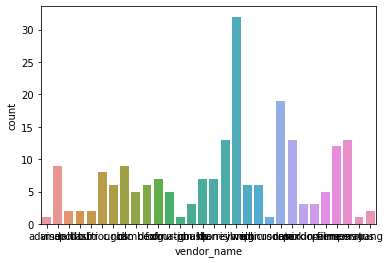

In [96]:
# Plot diagnosos frequencies
sns.countplot ( computer_hardware_data [ 'vendor_name' ],label = "Count" ) # boxplot

In [97]:
# Descriptive Statistics: Describe each variable by class (means only)
computer_hardware_data.groupby ( [ 'vendor_name' ] )[ "MYCT", "MMIN", "MMAX", "CACH","CHMIN", "CHMAX","PRP", "ERP" ].mean()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
vendor_name,,,,,,,,
adviser,125.000000,256.000000,6000.000000,256.000000,16.000000,128.000000,198.000000,199.000000
amdahl,26.000000,13333.333333,37333.333333,56.888889,13.333333,33.777778,416.333333,436.666667
apollo,400.000000,756.000000,3250.000000,2.000000,1.000000,4.000000,39.000000,23.500000
basf,55.000000,3000.000000,12000.000000,65.000000,1.000000,8.000000,115.000000,93.500000
bti,275.000000,288.000000,8032.000000,0.000000,2.500000,18.000000,22.500000,39.500000
burroughs,137.750000,2129.500000,4862.500000,18.750000,5.750000,38.375000,49.750000,44.625000
c.r.d,320.000000,320.000000,4500.000000,2.666667,1.000000,5.833333,42.666667,25.666667
cambex,50.000000,1600.000000,12000.000000,8.000000,3.000000,5.400000,42.800000,58.600000
cdc,46.666667,2426.666667,9126.666667,45.111111,8.333333,17.555556,130.111111,80.222222


In [98]:
# Descriptive Statistics: Describe each variable by class (means only)
computer_hardware_data.groupby ( [ 'vendor_name' ] )[ "MYCT", "MMIN", "MMAX", "CACH","CHMIN", "CHMAX","PRP", "ERP" ].describe()

MYCT                                                       \
             count        mean         std    min     25%    50%    75%   
vendor_name                                                               
adviser        1.0  125.000000         NaN  125.0  125.00  125.0  125.0   
amdahl         9.0   26.000000    3.000000   23.0   23.00   26.0   29.0   
apollo         2.0  400.000000    0.000000  400.0  400.00  400.0  400.0   
basf           2.0   55.000000    7.071068   50.0   52.50   55.0   57.5   
bti            2.0  275.000000  106.066017  200.0  237.50  275.0  312.5   
burroughs      8.0  137.750000   19.024420  110.0  134.75  143.0  143.0   
c.r.d          6.0  320.000000    0.000000  320.0  320.00  320.0  320.0   
cambex         5.0   50.000000    0.000000   50.0   50.00   50.0   50.0   
cdc            9.0   46.666667   13.143439   25.0   50.00   50.0   50.0   
dec            6.0  401.000000  324.090111  133.0  149.75  260.0  687.5   
dg             7.0  311.428571  268.727158  110.0  125.00  200.0  460.0   
formation      5.0  800.000000    0.000000  800.0  800.00  800.0  800.0   
four-phase     1.0  125.000000         NaN  125.0  125.00  125.0  125.0   
gould          3.0   75.000000    0.000000   75.0   75.00   75.0   75.0   
harris         7.0  282.857143   45.355737  180.0  300.00  300.0  300.0   
honeywell     13.0  208.461538   90.631686  140.0  140.00  140.0  300.0   
hp             7.0  104.285714   33.964267   75.0   82.50  105.0  105.0   
ibm           32.0  444.375000  458.530313   17.0   49.25  225.0  900.0   
ipl            6.0   50.000000    0.000000   50.0   50.00   50.0   50.0   
magnuson       6.0   75.000000   27.386128   50.0   50.00   75.0  100.0   
microdata      1.0  150.000000         NaN  150.0  150.00  150.0  150.0   
nas           19.0   64.421053   26.667325   30.0   40.00   60.0   83.5   
ncr           13.0   55.538462   21.481059   38.0   38.00   56.0   56.0   
nixdorf        3.0  200.000000    0.000000  200.0  200.00  200.0  200.0   
perkin-elmer   3.0  250.000000    0.000000  250.0  250.00  250.0  250.0   
prime          5.0  160.000000    0.000000  160.0  160.00  160.0  160.0   
siemens       12.0   92.750000   74.856378   26.0   45.50   64.5  105.0   
sperry        13.0  101.384615   62.055806   30.0   50.00   98.0  180.0   
sratus         1.0  125.000000         NaN  125.0  125.00  125.0  125.0   
wang           2.0  480.000000    0.000000  480.0  480.00  480.0  480.0   

                      MMIN                ...     PRP           ERP  \
                 max count          mean  ...     75%     max count   
vendor_name                               ...                         
adviser        125.0   1.0    256.000000  ...  198.00   198.0   1.0   
amdahl          29.0   9.0  13333.333333  ...  489.00  1144.0   9.0   
apollo         400.0   2.0    756.000000  ...   39.50    40.0   2.0   
basf            60.0   2.0   3000.000000  ...  126.50   138.0   2.0   
bti            350.0   2.0    288.000000  ...   28.75    35.0   2.0   
burroughs      167.0   8.0   2129.500000  ...   64.75   120.0   8.0   
c.r.d          320.0   6.0    320.000000  ...   60.00    77.0   6.0   
cambex          50.0   5.0   1600.000000  ...   52.00    60.0   5.0   
cdc             64.0   9.0   2426.666667  ...  208.00   368.0   9.0   
dec            810.0   6.0    756.000000  ...   69.50    72.0   6.0   
dg             700.0   7.0    805.714286  ...   65.50   138.0   7.0   
formation      800.0   5.0    256.000000  ...   20.00    22.0   5.0   
four-phase     125.0   1.0    512.000000  ...   36.00    36.0   1.0   
gould           75.0   3.0   2000.000000  ...  201.50   259.0   3.0   
harris         300.0   7.0    630.857143  ...   51.50    84.0   7.0   
honeywell      330.0  13.0   1615.384615  ...   66.00   189.0  13.0   
hp             175.0   7.0   1252.571429  ...   47.00    64.0   7.0   
ibm           1500.0  32.0   3014.750000  ...   82.00   465.0  32.0   
ipl             50.0   6.0   3000.000000  ...  

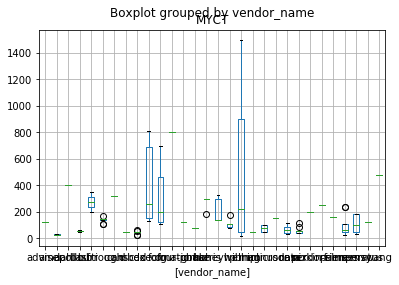

In [99]:
boxplot = computer_hardware_data.boxplot ( column = [ "MYCT" ], by = [ 'vendor_name' ] )

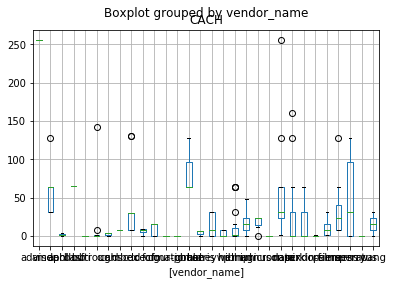

In [100]:
boxplot = computer_hardware_data.boxplot ( column = [ "CACH" ], by = [ 'vendor_name' ] )

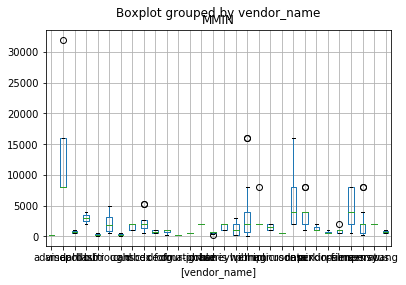

In [101]:
boxplot = computer_hardware_data.boxplot ( column = [ "MMIN" ], by = [ 'vendor_name' ] )

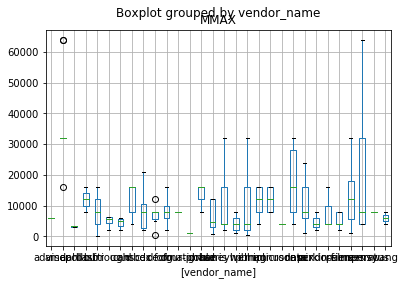

In [102]:
boxplot = computer_hardware_data.boxplot ( column = [ "MMAX" ], by = [ 'vendor_name' ] )

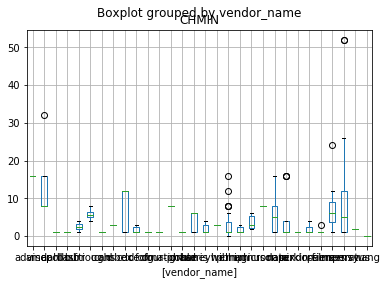

In [103]:
boxplot = computer_hardware_data.boxplot ( column = [ "CHMIN" ], by = [ 'vendor_name' ] )

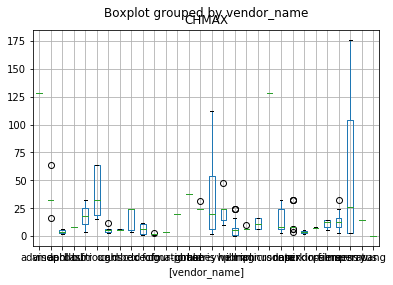

In [104]:
boxplot = computer_hardware_data.boxplot ( column = [ "CHMAX" ], by = [ 'vendor_name' ] )

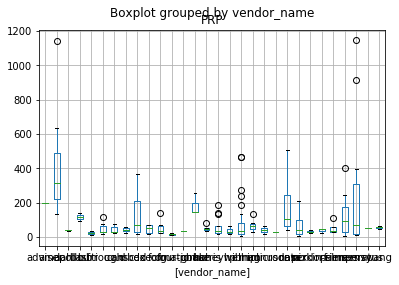

In [105]:
boxplot = computer_hardware_data.boxplot ( column = [ "PRP" ], by = [ 'vendor_name' ] )

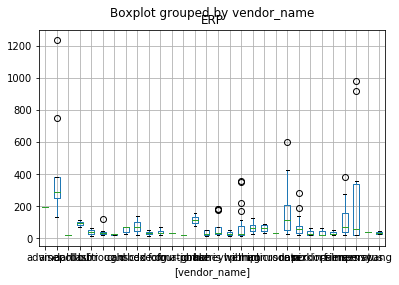

In [106]:
boxplot = computer_hardware_data.boxplot ( column = [ "ERP" ], by = [ 'vendor_name' ] )

In [107]:
# Descriptive Statistics: Attribute by Class
# MYCT by Class
describe_by_category ( computer_hardware_data, "MYCT", "vendor_name", transpose = True )

"MYCT", "MMIN", "MMAX", "CACH","CHMIN", "CHMAX","PRP", "ERP"

vendor_name  adviser  amdahl  apollo       basf         bti  burroughs  c.r.d  \
count            1.0     9.0     2.0   2.000000    2.000000    8.00000    6.0   
mean           125.0    26.0   400.0  55.000000  275.000000  137.75000  320.0   
std              NaN     3.0     0.0   7.071068  106.066017   19.02442    0.0   
min            125.0    23.0   400.0  50.000000  200.000000  110.00000  320.0   
25%            125.0    23.0   400.0  52.500000  237.500000  134.75000  320.0   
50%            125.0    26.0   400.0  55.000000  275.000000  143.00000  320.0   
75%            125.0    29.0   400.0  57.500000  312.500000  143.00000  320.0   
max            125.0    29.0   400.0  60.000000  350.000000  167.00000  320.0   

vendor_name  cambex        cdc         dec  ...  microdata         nas  \
count           5.0   9.000000    6.000000  ...        1.0   19.000000   
mean           50.0  46.666667  401.000000  ...      150.0   64.421053   
std             0.0  13.143439  324.090111  ... 

('MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP')

**Notes**


In [108]:
# Descriptive Statistics: Attribute by Class
# MMIN by Class
describe_by_category ( computer_hardware_data, "MMIN", "vendor_name", transpose = True )

vendor_name  adviser        amdahl       apollo         basf         bti  \
count            1.0      9.000000     2.000000     2.000000    2.000000   
mean           256.0  13333.333333   756.000000  3000.000000  288.000000   
std              NaN   8000.000000   345.068109  1414.213562  316.783838   
min            256.0   8000.000000   512.000000  2000.000000   64.000000   
25%            256.0   8000.000000   634.000000  2500.000000  176.000000   
50%            256.0   8000.000000   756.000000  3000.000000  288.000000   
75%            256.0  16000.000000   878.000000  3500.000000  400.000000   
max            256.0  32000.000000  1000.000000  4000.000000  512.000000   

vendor_name    burroughs       c.r.d       cambex          cdc          dec  \
count           8.000000    6.000000     5.000000     9.000000     6.000000   
mean         2129.500000  320.000000  1600.000000  2426.666667   756.000000   
std          1559.237817  156.767344   547.722558  1743.839155   267.288608   

**Notes**



In [109]:
# Descriptive Statistics: Attribute by Class
# MMAX by Class
describe_by_category ( computer_hardware_data, "MMAX", "vendor_name", transpose = True )

vendor_name  adviser        amdahl       apollo          basf           bti  \
count            1.0      9.000000     2.000000      2.000000      2.000000   
mean          6000.0  37333.333333  3250.000000  12000.000000   8032.000000   
std              NaN  16000.000000   353.553391   5656.854249  11268.453665   
min           6000.0  16000.000000  3000.000000   8000.000000     64.000000   
25%           6000.0  32000.000000  3125.000000  10000.000000   4048.000000   
50%           6000.0  32000.000000  3250.000000  12000.000000   8032.000000   
75%           6000.0  32000.000000  3375.000000  14000.000000  12016.000000   
max           6000.0  64000.000000  3500.000000  16000.000000  16000.000000   

vendor_name    burroughs        c.r.d        cambex           cdc  \
count           8.000000     6.000000      5.000000      9.000000   
mean         4862.500000  4500.000000  12000.000000   9126.666667   
std          1846.183322  1643.167673   5656.854249   7476.688772   
min         

**Notes**


In [110]:
# Descriptive Statistics: Attribute by Class
# CACH by Class
describe_by_category ( computer_hardware_data, "CACH", "vendor_name", transpose = True )

vendor_name  adviser      amdahl    apollo  basf  bti  burroughs     c.r.d  \
count            1.0    9.000000  2.000000   2.0  2.0    8.00000  6.000000   
mean           256.0   56.888889  2.000000  65.0  0.0   18.75000  2.666667   
std              NaN   31.098410  2.828427   0.0  0.0   49.87914  2.065591   
min            256.0   32.000000  0.000000  65.0  0.0    0.00000  0.000000   
25%            256.0   32.000000  1.000000  65.0  0.0    0.00000  1.000000   
50%            256.0   64.000000  2.000000  65.0  0.0    0.00000  4.000000   
75%            256.0   64.000000  3.000000  65.0  0.0    2.00000  4.000000   
max            256.0  128.000000  4.000000  65.0  0.0  142.00000  4.000000   

vendor_name  cambex         cdc       dec  ...  microdata         nas  \
count           5.0    9.000000  6.000000  ...        1.0   19.000000   
mean            8.0   45.111111  6.333333  ...        0.0   55.052632   
std             0.0   49.747976  3.614784  ...        NaN   57.210599   
min  

**Notes**



In [111]:
# Descriptive Statistics: Attribute by Class
# CHMIN by Class
describe_by_category ( computer_hardware_data, "CHMIN", "vendor_name", transpose = True )

vendor_name  adviser     amdahl  apollo  basf      bti  burroughs  c.r.d  \
count            1.0   9.000000     2.0   2.0  2.00000    8.00000    6.0   
mean            16.0  13.333333     1.0   1.0  2.50000    5.75000    1.0   
std              NaN   8.000000     0.0   0.0  2.12132    1.28174    0.0   
min             16.0   8.000000     1.0   1.0  1.00000    4.00000    1.0   
25%             16.0   8.000000     1.0   1.0  1.75000    5.00000    1.0   
50%             16.0   8.000000     1.0   1.0  2.50000    5.50000    1.0   
75%             16.0  16.000000     1.0   1.0  3.25000    6.25000    1.0   
max             16.0  32.000000     1.0   1.0  4.00000    8.00000    1.0   

vendor_name  cambex        cdc       dec  ...  microdata        nas  \
count           5.0   9.000000  6.000000  ...        1.0  19.000000   
mean            3.0   8.333333  1.666667  ...        8.0   5.684211   
std             0.0   5.500000  1.032796  ...        NaN   4.714665   
min             3.0   1.000000 

In [112]:
# Descriptive Statistics: Attribute by Class
# CHMAX by Class
describe_by_category ( computer_hardware_data, "CHMAX", "vendor_name", transpose = True )

vendor_name  adviser     amdahl    apollo  basf       bti  burroughs  \
count            1.0   9.000000  2.000000   2.0   2.00000   8.000000   
mean           128.0  33.777778  4.000000   8.0  18.00000  38.375000   
std              NaN  12.507775  2.828427   0.0  19.79899  22.154893   
min            128.0  16.000000  2.000000   8.0   4.00000  15.000000   
25%            128.0  32.000000  3.000000   8.0  11.00000  19.000000   
50%            128.0  32.000000  4.000000   8.0  18.00000  32.000000   
75%            128.0  32.000000  5.000000   8.0  25.00000  64.000000   
max            128.0  64.000000  6.000000   8.0  32.00000  64.000000   

vendor_name      c.r.d    cambex        cdc       dec  ...  microdata  \
count         6.000000  5.000000   9.000000   6.00000  ...        1.0   
mean          5.833333  5.400000  17.555556   6.50000  ...      128.0   
std           3.311596  0.547723   9.670976   5.00999  ...        NaN   
min           3.000000  5.000000   4.000000   1.00000  ... 

In [113]:
# Descriptive Statistics: Attribute by Class
# PRP by Class
describe_by_category ( computer_hardware_data, "PRP", "vendor_name", transpose = True )

vendor_name  adviser       amdahl     apollo        basf       bti  \
count            1.0     9.000000   2.000000    2.000000   2.00000   
mean           198.0   416.333333  39.000000  115.000000  22.50000   
std              NaN   315.423129   1.414214   32.526912  17.67767   
min            198.0   132.000000  38.000000   92.000000  10.00000   
25%            198.0   220.000000  38.500000  103.500000  16.25000   
50%            198.0   318.000000  39.000000  115.000000  22.50000   
75%            198.0   489.000000  39.500000  126.500000  28.75000   
max            198.0  1144.000000  40.000000  138.000000  35.00000   

vendor_name   burroughs      c.r.d    cambex         cdc        dec  ...  \
count          8.000000   6.000000   5.00000    9.000000   6.000000  ...   
mean          49.750000  42.666667  42.80000  130.111111  47.333333  ...   
std           34.208395  23.846733  13.38656  124.456262  24.873011  ...   
min           19.000000  23.000000  26.00000   20.000000  18.0000

In [114]:
# Descriptive Statistics: Attribute by Class
# ERP by Class
describe_by_category ( computer_hardware_data, "ERP", "vendor_name", transpose = True )

vendor_name  adviser       amdahl     apollo        basf        bti  \
count            1.0     9.000000   2.000000    2.000000   2.000000   
mean           199.0   436.666667  23.500000   93.500000  39.500000   
std              NaN   346.665905   0.707107   33.234019  34.648232   
min            199.0   132.000000  23.000000   70.000000  15.000000   
25%            199.0   253.000000  23.250000   81.750000  27.250000   
50%            199.0   290.000000  23.500000   93.500000  39.500000   
75%            199.0   381.000000  23.750000  105.250000  51.750000   
max            199.0  1238.000000  24.000000  117.000000  64.000000   

vendor_name   burroughs      c.r.d     cambex         cdc        dec  ...  \
count          8.000000   6.000000   5.000000    9.000000   6.000000  ...   
mean          44.625000  25.666667  58.600000   80.222222  35.833333  ...   
std           33.101306   3.265986  21.442948   42.845005  12.172373  ...   
min           22.000000  21.000000  30.000000   23.0

## KNN: Computer Hardware Data

We know this dataset is used for a regression problem, so we'll use the KNN Regressor

### Assign Feature Matrix & Target Vector


In [115]:
# Assign Variables
# X = Feature Matrix; All Attributes (i.e., drop instance class column)
# y = Target Vector; Categorical instance class (i.e., doesn't include the attribute features)
X = computer_hardware_data.drop ( [ "vendor_name", "model_name", "PRP", "ERP" ], axis = 1 ).values
y_real = computer_hardware_data [ "PRP" ].values
y_ols = computer_hardware_data [ "ERP" ].values

### K-Nearest Neighbors Regression

In [116]:
#KNN Regression

# Log Experiment: KNN Regression Computer Hardware Data
logger.info ( "Running KNN Regression on Computer Hardware Data Set" )

np.random.seed ( 6222020 )

# Run Experiment: Standardize data, fit model (split X & y; use training data set), make predictions (split X & y; use test data set)
run_experiment (
        X = X,
        y = y_real,
        model_call = lambda k: KNearestNeighborRegression ( k = k),
        param_grid = { "k": list ( range ( 1, 5 ) ) },
        scoring_func = lambda *args, **kwargs: -1
        * np.sqrt ( mean_squared_error ( *args, **kwargs ) ),
        cv = KFoldCV ( number_of_folds = 5 ),
    )

# Forest Fires Data Set
## Extract, Transform, Load: Forest Fires Data

### Description

[Regression] This is a difficult regression task, where the aim is to predict the burned area of forest
fires, in the northeast region of Portugal, by using meteorological and other data .

Data obtained from:https://archive.ics.uci.edu/ml/datasets/Forest+Fires

### Attribute Information: 13 Attributes (d)

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
3. month - month of the year: 'jan' to 'dec' 
4. day - day of the week: 'mon' to 'sun' 
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20 
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10 
9. temp - temperature in Celsius degrees: 2.2 to 33.30 
10. RH - relative humidity in %: 15.0 to 100 
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
(this output variable is very skewed towards 0.0, thus it may make 
sense to model with the logarithm transform).


In [117]:
# Log ETL: Forest Fire Data
logger.info ( "ETL: Forest Fire Data Set" )

# Read Forest Fire Data
# Create dataframe
forest_fire_data = pd.read_csv (
        "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
    )


In [118]:
# Confirm data was properly read by examining data frame
forest_fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


**Notes**

As expected, we see 13 columns (# attributes and # class label). There are 517 entries (n = 517). We see that month and day attributes are objects; X, Y, RH are integer type variables; and FFMC, DMC, DC, ISI, temp, wind, rain, area variables are all float type.

In [119]:
# Verify whether any values are null
forest_fire_data.isnull().values.any()

False

**Note**

We see there are no null instances

In [120]:
# Again
forest_fire_data.isna().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

## (Brief) Exploratory Data Analysis: Forrest Fire Data

### Single Variable

Let's look at the summary statistics & Tukey's 5


In [121]:
# Look at first few rows of dataframe
forest_fire_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## (Brief) Exploratory Data Analysis: Forest Fire Data

### Single Variable

Let's look at the summary statistics & Tukey's 5


In [122]:
# Log EDA: Forest Fire Data
logger.info ( "EDA: Forest Fire Data Set" )

# Descriptive Statistics
forest_fire_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


**Notes**

Total number of observations: 517

Data includes: 
    - Arithmetic Mean
    - Variance: Spread of distribution
    - Standard Deviation:Square root of variance
    - Minimum Observed Value
    - Maximum Observed Value
   

Q1: For $Attribute_{i}$ 25% of observations are between min $Attribute_{i}$ and Q1 $Attribute_{i}$

Q2: Median. Thus for $Attribute_{i}$, 50% of observations are lower (but not lower than min $Attribute_{i}$) and 50% of the observations are higher (but not higher than Q3 $Attribute_{i}$

Q4: For $Attribute_{i}$, 75% of the observations are between min $Attribute_{i}$ and Q4 $Attribute_{i}$


## (Brief) Exploratory Data Analysis: Forest Fire Data

### Pair-Wise: Attribute by Class

In [123]:
# Frequency of diagnoses classifications
forest_fire_data [ 'area' ].value_counts() # raw counts

0.00     247
1.94       3
3.71       2
0.90       2
1.95       2
        ... 
1.26       1
2.44       1
2.03       1
2.21       1
24.24      1
Name: area, Length: 251, dtype: int64

In [124]:
# Get Columns
list ( forest_fire_data.columns )

['X',
 'Y',
 'month',
 'day',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain',
 'area']

In [125]:
# Descriptive Statistics: Describe each variable by class (means only)
forest_fire_data.groupby ( [ 'area' ] )[ 'X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain' ].mean()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
area,,,,,,,,,,
0.00,4.518219,4.226721,90.219028,106.679757,522.878138,8.851822,18.427935,44.894737,3.91336,0.013765
0.09,5.000000,4.000000,91.800000,175.100000,700.700000,13.800000,25.700000,39.000000,5.40000,0.000000
0.17,6.000000,5.000000,94.300000,131.700000,607.100000,22.700000,19.400000,55.000000,4.00000,0.000000
0.21,6.000000,5.000000,93.100000,157.300000,666.700000,13.500000,22.100000,37.000000,3.60000,0.000000
0.24,8.000000,5.000000,93.100000,157.300000,666.700000,13.500000,24.000000,36.000000,3.10000,0.000000
...,...,...,...,...,...,...,...,...,...,...
200.94,2.000000,2.000000,92.500000,121.100000,674.400000,8.600000,18.200000,46.000000,1.80000,0.000000
212.88,1.000000,2.000000,91.000000,129.500000,692.600000,7.000000,18.800000,40.000000,2.20000,0.000000
278.53,7.000000,4.000000,89.200000,103.900000,431.600000,6.400000,22.600000,57.000000,4.90000,0.000000


In [126]:
# Descriptive Statistics: Describe each variable by class (means only)
forest_fire_data.groupby ( [ 'area' ] )[ 'X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain' ].describe()

X                                                   Y            \
         count      mean       std  min  25%  50%  75%  max  count      mean   
area                                                                           
0.00     247.0  4.518219  2.230305  1.0  3.0  4.0  6.0  9.0  247.0  4.226721   
0.09       1.0  5.000000       NaN  5.0  5.0  5.0  5.0  5.0    1.0  4.000000   
0.17       1.0  6.000000       NaN  6.0  6.0  6.0  6.0  6.0    1.0  5.000000   
0.21       1.0  6.000000       NaN  6.0  6.0  6.0  6.0  6.0    1.0  5.000000   
0.24       1.0  8.000000       NaN  8.0  8.0  8.0  8.0  8.0    1.0  5.000000   
...        ...       ...       ...  ...  ...  ...  ...  ...    ...       ...   
200.94     1.0  2.000000       NaN  2.0  2.0  2.0  2.0  2.0    1.0  2.000000   
212.88     1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0    1.0  2.000000   
278.53     1.0  7.000000       NaN  7.0  7.0  7.0  7.0  7.0    1.0  4.000000   
746.28     1.0  8.000000       NaN  8.0  8.0  8.0  8.0  8.0    1.0  6.000000   
1090.84    1.0  6.000000       NaN  6.0  6.0  6.0  6.0  6.0    1.0  5.000000   

         ...  wind        rain                                               
         ...   75%  max  count      mean       std  min  25%  50%  75%  max  
area     ...                                                                 
0.00     ...  5.15  8.5  247.0  0.013765  0.100268  0.0  0.0  0.0  0.0  1.0  
0.09     ...  5.40  5.4    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
0.17     ...  4.00  4.0    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
0.21     ...  3.60  3.6    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
0.24     ...  3.10  3.1    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
...      ...   ...  ...    ...       ...       ...  ...  ...  ...  ...  ...  
200.94   ...  1.80  1.8    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
212.88   ...  2.20  2.2    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
278.53   ...  4.90  4.9    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
746.28   ...  4.90  4.9    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
1090.84  ...  4.00  4.0    1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0  

[251 rows x 80 columns]

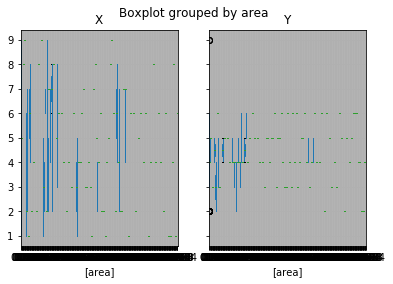

In [127]:
boxplot = forest_fire_data.boxplot ( column = [ "X", "Y"], by = [ 'area' ] )

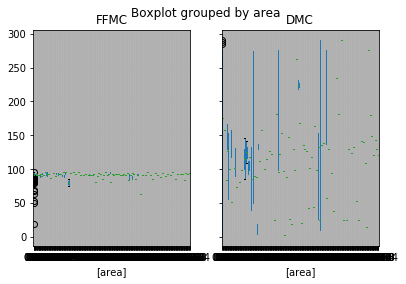

In [128]:
boxplot = forest_fire_data.boxplot ( column = [ 'FFMC','DMC' ], by = [ 'area' ] )

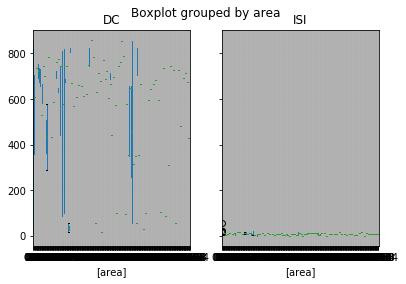

In [129]:
boxplot = forest_fire_data.boxplot ( column = [ "DC", "ISI" ], by = [ 'area' ] )

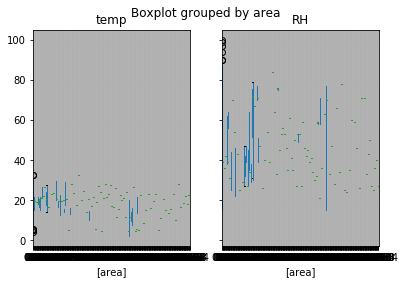

In [130]:
boxplot = forest_fire_data.boxplot ( column = [ "temp", "RH" ], by = [ 'area' ] )

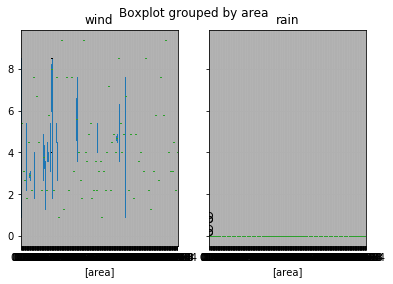

In [131]:
boxplot = forest_fire_data.boxplot ( column = [ "wind", "rain" ], by = [ 'area' ] )

## KNN: Forest Fire Data

We know we're solving a regression problem, so we'll use KNN Regressor

### Assign Feature Matrix & Target Vector

In [132]:
# Assign Variables
# X = Feature Matrix; All Attributes (i.e., drop instance class column)
# y = Target Vector; Categorical instance class (i.e., doesn't include the attribute features)
X = forest_fire_data.drop ( "area", axis = 1 ).pipe (
        lambda df: pd.get_dummies ( df, columns = [ "month", "day" ], drop_first = True )
    )
y = forest_fire_data [ "area" ].values

### KNN Regression

In [133]:
# Log Experiment: KNN Regression Forest Fire Data (Full Design Matrix)
logger.info ( "Running KNN Regression (Full Design Matrix): Forest Fire Data Set" )

np.random.seed ( 62202020 )

# Run Experiment: Standardize data, fit model (split X & y; use training data set), make predictions (split X & y; use test data set)
model = run_experiment (
        X = X.values,
        y = y,
        model_call = lambda k: KNearestNeighborRegression ( k = k ),
        param_grid = { "k": list ( range ( 1, 5 ) ) },
        scoring_func = lambda * args, ** kwargs: -1
        * np.sqrt ( mean_squared_error ( *args, ** kwargs ) ),
        cv = KFoldCV ( number_of_folds = 5 ),
    )

In [134]:
# Log Experiment: KNN Regression Forest Fire Data (Partial Design Matrix)
logger.info ( "Running KNN Regression (Partial Design Matrix): Forest Fire Data Set" )

np.random.seed ( 62202020 )

# Run Experiment: Standardize data, fit model (split X & y; use training data set), make predictions (split X & y; use test data set)
model = run_experiment (
        X = X.loc ( axis = 1 )[ "temp", "RH", "wind", "rain" ].values,
        y = y,
        model_call = lambda k: KNearestNeighborRegression ( k = k ),
        param_grid = { "k": list ( range ( 1, 5 ) ) },
        scoring_func = lambda * args, ** kwargs: -1
        * np.sqrt ( mean_squared_error ( * args, ** kwargs ) ),
        cv = KFoldCV (number_of_folds = 5 ),
    )